# **Prediksi Harga Mobil Bekas di Arab Saudi pada Platform Syarah.com Menggunakan Machine Learning**
---

## **Business Understanding**

### **Latar Belakang**

Pasar mobil bekas di Arab Saudi menunjukkan pertumbuhan yang pesat, didorong oleh tingginya permintaan terhadap kendaraan dengan harga yang lebih terjangkau serta meningkatnya kebutuhan mobilitas masyarakat. Meskipun demikian, menentukan harga yang tepat untuk mobil bekas tetap menjadi tantangan, baik bagi penjual maupun pembeli. Hal ini disebabkan oleh banyaknya variabel yang memengaruhi nilai kendaraan, seperti merek, tahun produksi, jarak tempuh, kapasitas mesin, hingga fitur tambahan yang dimiliki.

Seiring dengan kemajuan teknologi di bidang data dan kecerdasan buatan, machine learning menjadi pendekatan yang menjanjikan dalam menghasilkan estimasi harga mobil bekas secara lebih akurat dan efisien. Model prediktif berbasis machine learning mampu menganalisis pola dari data historis dan mempertimbangkan berbagai atribut kendaraan secara simultan, sehingga dapat memberikan estimasi harga yang lebih objektif dan informatif.

Syarah.com, sebagai salah satu platform e-commerce otomotif terbesar di Arab Saudi, memainkan peran penting dalam transformasi digital pasar otomotif. Didirikan pada tahun 2015 dan berbasis di Riyadh, Syarah.com menawarkan layanan jual beli mobil baru dan bekas secara online dengan proses yang cepat, aman, dan transparan.

Untuk meningkatkan kualitas layanan dan memperkuat kepercayaan pengguna, Syarah.com berupaya menyediakan fitur estimasi harga mobil bekas yang cerdas berdasarkan karakteristik kendaraan yang dimasukkan. Dengan adanya sistem prediksi harga yang andal, pengguna dapat membuat keputusan jual beli dengan lebih percaya diri, sehingga mendukung efisiensi transaksi dan meningkatkan kepuasan pengguna di dalam platform.

### **Masalah**
- Harga mobil bekas sangat bervariasi karena dipengaruhi oleh banyak faktor seperti tahun produksi, jarak tempuh, merek, kondisi kendaraan, dan fitur tambahan, sehingga sulit untuk dinilai secara objektif.
- Penjual cenderung menentukan harga berdasarkan intuisi atau referensi terbatas, yang berisiko menyebabkan harga tidak sesuai pasar (overprice atau underprice).
- Harga yang terlalu tinggi menyulitkan proses penjualan, sedangkan harga yang terlalu rendah menyebabkan kerugian ekonomi bagi penjual.
- Ketiadaan fitur penilaian harga otomatis pada platform seperti Syarah.com membuat pembeli rentan membayar lebih mahal dan platform kehilangan potensi margin keuntungan.
- Proses evaluasi harga yang dilakukan secara manual memakan waktu dan kurang efisien, terutama bagi platform yang menangani ribuan listing kendaraan setiap harinya.

### **Tujuan Analisis**
- Membangun model machine learning yang mampu memprediksi harga mobil bekas secara akurat dan andal untuk pasar otomotif Arab Saudi, dengan memanfaatkan data historis kendaraan.
- Mengidentifikasi serta menganalisis fitur-fitur utama yang memengaruhi harga mobil bekas, seperti tahun produksi, jarak tempuh, merek, kapasitas mesin, dan atribut kendaraan lainnya, guna memahami kontribusinya terhadap nilai pasar kendaraan.
- Merancang sistem prediksi harga berbasis machine learning yang dapat diintegrasikan ke dalam platform Syarah.com, dengan tujuan untuk:
    + Membantu penjual dalam menetapkan harga yang kompetitif dan sesuai pasar.
    + Memberikan acuan harga yang objektif bagi pembeli untuk pengambilan keputusan.
    + Mendukung efisiensi operasional dan meningkatkan potensi margin keuntungan bagi perusahaan melalui proses evaluasi harga yang lebih cepat dan konsisten.

### **Stakeholder: Product Manager Syarah.com**
Deskripsi:
Product Manager (PM) adalah pemangku kepentingan utama yang bertanggung jawab atas perencanaan dan pengembangan fitur-fitur baru pada platform Syarah.com. Dalam konteks pengembangan sistem prediksi harga mobil bekas berbasis machine learning, PM berperan dalam menerjemahkan kebutuhan pasar dan pengguna ke dalam bentuk solusi produk digital yang dapat diimplementasikan secara nyata.

## **Pemahaman Data**

In [691]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# missing value treatment
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# column transformer
from sklearn.compose import ColumnTransformer

# pipeline (menggabungkan beberapa tahapan jadi 1)
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score, cross_validate

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

# model machine learning
import statsmodels.api as sm # model interpretation
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import lightgbm as lgb

# evaluation
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# normaltest
from scipy.stats import normaltest

# Residual Plot
from yellowbrick.regressor import ResidualsPlot

# model interpretation
import shap

# save model
import joblib

import warnings
# Nonaktifkan semua warning
warnings.filterwarnings("ignore")

In [692]:
df = pd.read_csv("UsedCarsSA_Unclean_EN.csv")
df.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.70,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.80,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.50,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.60,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.00,Gas,Automatic,Used,41912,Riyadh,59500,False


### Penjelasan Kolom

| **Nama Kolom**  | **Deskripsi**  |
|-------------|------------------|
| **Link**    | Alamat halaman website tempat mobil diperjualbelikan |
| **Make**    | Nama merk mobil |
| **Type**    | Tipe mobil |
| **Year**    | Tahun pembuatan mobil |
| **Origin**  | Tempat mobil diproduksi atau dijual untuk pertama kali |
| **Color**   | Warna mobil |
| **Options** | Fitur tambahan yang dimiliki mobil |
| **Condition** | Kondisi dari mobil yang diperjual-belikan |
| **Engine_Size** | Ukuran mesin dalam satuan liter |
| **Fuel_Type**  | Jenis bahan bakar |
| **Gear_Type**  | Jenis transmisi |
| **Mileage**    | Jarak tempuh pemakaian dalam satuan Km |
| **Region**     | Regional tempat dimana mobil ini dijual |
| **Price**      | Harga mobil bekas dalam mata uang SAR (Saudi Riyal) |
| **Negotiable** | True: jika harganya 0 karena merujuk pada tidak adanya harga pasti (tergantung penawaran calon pembeli) <br> False: jika harganya sudah ditunjukan karena ini merupakan harga pasti (fixed price) |


In [693]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
 14  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 910.3+ KB


In [694]:
def unique_value(df):
    unique = pd.DataFrame()
    unique['Columns'] = df.columns
    unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return unique

unique_value(df)

,Columns,Unique Count,Unique
0,Link,8228,[https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D...
1,Make,65,"[Chrysler, Nissan, Hyundai, Honda, Toyota, GMC..."
2,Type,435,"[C300, Patrol, Sunny, Elantra, Accord, Land Cr..."
3,Year,55,"[2018, 2016, 2019, 2011, 2009, 2017, 2014, 202..."
4,Origin,3,"[Saudi, Gulf Arabic, Other, nan]"
5,Color,15,"[Black, White, Silver, Grey, Navy, Bronze, Red..."
6,Options,3,"[Full, Standard, Semi Full, nan]"
7,Engine_Size,75,"[5.7, 4.8, 1.5, 1.6, 2.0, 4.5, 3.6, 2.5, 5.6, ..."
8,Fuel_Type,3,"[Gas, Diesel, Hybrid]"
9,Gear_Type,2,"[Automatic, Manual, nan]"


In [695]:
# Ubah format tampilan float: tanpa scientific notation, 2 desimal
pd.options.display.float_format = '{:,.2f}'.format

# Tampilkan deskripsi ulang
print(df.describe())

          Year  Engine_Size       Mileage
count 8,248.00     5,982.00      8,248.00
mean  2,014.01         3.18    149,412.81
std       5.94         1.57    345,525.85
min   1,936.00         1.00        100.00
25%   2,012.00         2.00     37,000.00
50%   2,016.00         2.70    101,657.50
75%   2,018.00         4.00    195,552.00
max   2,022.00         9.00 20,000,000.00


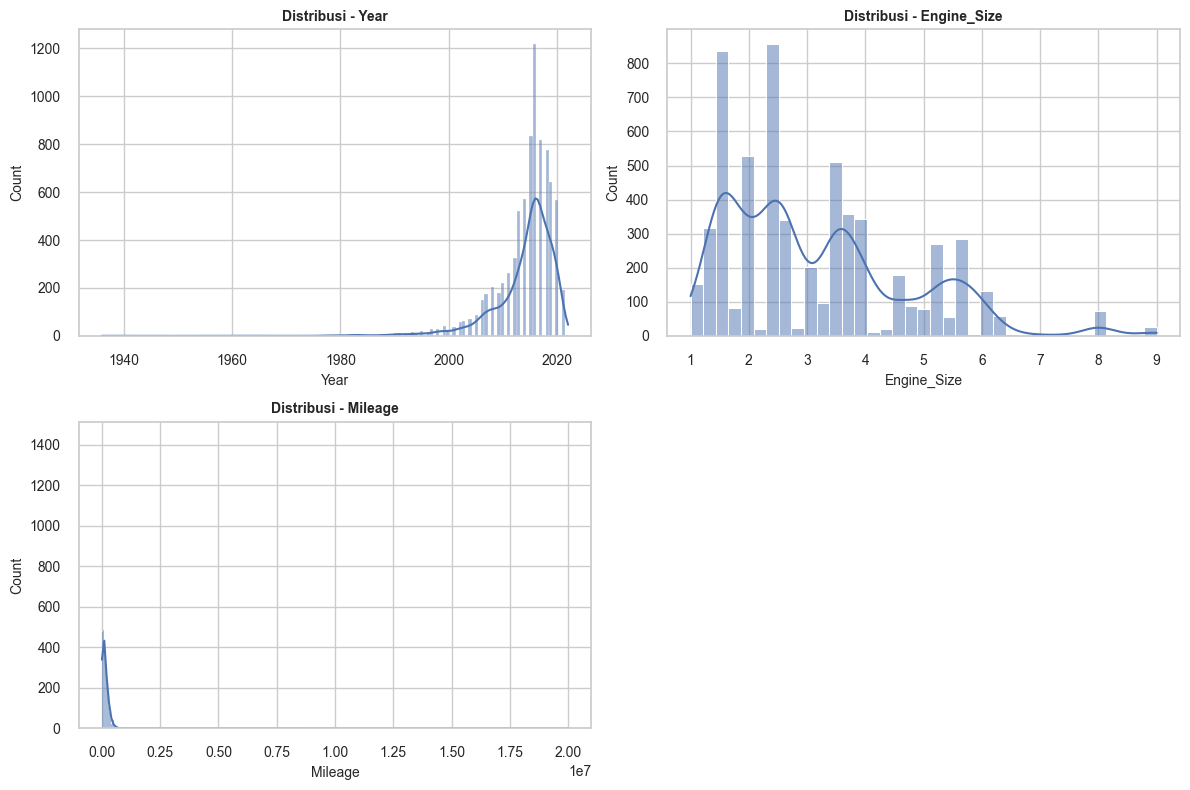

In [696]:
# Identifikasi kolom numerikal
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Atur ukuran font default
plt.rcParams.update({
    'font.size': 10,             # Ukuran font umum
    'axes.titlesize': 10,        # Ukuran judul grafik
    'axes.labelsize': 10,        # Ukuran label sumbu
    'xtick.labelsize': 10,       # Ukuran angka pada sumbu X
    'ytick.labelsize': 10,       # Ukuran angka pada sumbu Y
    'figure.titlesize': 20       # Ukuran judul figure (jika ada)
})

# Misal numerical_columns adalah list kolom numerik
num_cols = len(numerical_columns)
cols = 2  # Jumlah kolom per baris
rows = math.ceil(num_cols / cols)  # Hitung jumlah baris yang dibutuhkan

plt.figure(figsize=(12, rows * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribusi - {col}', fontweight='bold')

plt.tight_layout()
plt.show()

## Interpretasi Distribusi Variabel

Berikut adalah interpretasi dari tiga variabel numerik utama dalam dataset mobil bekas:

---

1. Distribusi `Year` (Tahun Produksi Mobil)

- Mayoritas mobil diproduksi setelah tahun **2000**, dengan puncak di sekitar **2015–2020**.
- Sedikit mobil berasal dari tahun **1980–2000**.
- Hampir tidak ada mobil dari sebelum tahun 1970, namun masih muncul sebagai outlier.
- Distribusinya **right-skewed** (semakin baru, semakin banyak).
- ⚠️ **Outlier**: Data dari tahun sebelum 1960 perlu diverifikasi — bisa jadi kesalahan input atau mobil klasik.

**Insight:**
> Mobil keluaran baru mendominasi. Peran tahun produksi sangat penting untuk model prediksi harga.

---

2. Distribusi `Engine_Size`

- Distribusi tidak normal (multimodal), menunjukkan beberapa kelompok engine size yang umum.
- Mayoritas mobil berada pada kisaran **1.0–3.0 liter**, cocok dengan city car, sedan, atau SUV kecil.
- Ada beberapa puncak signifikan di:
  - 1.3–1.5 L (city car)
  - 2.0–3.0 L (sedan/SUV)
  - 5.0–6.0 L dan 8.9 L (kemungkinan mobil performa tinggi atau **anomali**)

**Insight:**
> Engine size cukup bervariasi. Perlu cek nilai ekstrem seperti 8.9L

---

3. Distribusi `Mileage` (Jarak Tempuh)

- Distribusi **sangat skewed ke kanan**.
- Mayoritas mobil memiliki mileage rendah, namun ada yang mencapai hingga **20 juta km**, yang sangat tidak realistis.
- **Outlier ekstrem** ini dapat merusak model prediksi dan perlu ditangani.

**Insight:**
> Mileage sangat penting, tapi outlier ekstrem (misal >1 juta km) kemungkinan salah input.

## **Pembersihan Data**

In [697]:
df_clean = df.copy()

### Penghapusan Kolom

- Kolom `Condition` dihapus karena seluruh nilai yang terdapat pada kolom ini menunjukkan status yang sama, yaitu "used" (mobil bekas).

- Kolom `Link` tidak dihapus terlebih dahulu, meskipun kolom ini berisi alamat halaman website, karena setiap nilai dalam kolom tersebut bersifat unik dan berfungsi sebagai identifikasi yang dapat membedakan setiap entri. Kolom ini juga berguna untuk mendeteksi adanya duplikasi data.

In [698]:
df_clean["Condition"].unique()

array(['Used'], dtype=object)

Berdasarkan nilai unik, terbukti bahwa kolom `Condition` hanya berisi satu nilai unik, yaitu "Used". Oleh karena itu, kolom ini dapat dihapus dari dataset.


In [699]:
df_clean.drop('Condition', axis=1, inplace=True)

### Cek Data Duplikat

In [700]:
df_clean.duplicated().sum()

np.int64(20)

Karena kolom `Link` belum dihapus, terdapat 20 entri duplikat yang merepresentasikan mobil yang sama karena memiliki nilai `Link` yang identik. Oleh karena itu, entri duplikat akan dihapus untuk memastikan bahwa setiap data merepresentasikan mobil yang unik. Penghapusan duplikasi ini penting untuk mencegah model memperoleh informasi yang berlebihan dari data yang sama. Duplikasi data dapat menyebabkan bias dalam hasil prediksi, mengurangi kemampuan generalisasi model, serta meningkatkan risiko overfitting.


In [701]:
df_clean = df_clean.drop_duplicates()

### Mengatasi Nilai *Missing Value*

In [702]:
df_clean.isna().sum()

Link              0
Make              0
Type              0
Year              0
Origin           95
Color             0
Options         109
Engine_Size    2263
Fuel_Type         0
Gear_Type        74
Mileage           0
Region            0
Price             0
Negotiable        0
dtype: int64

Terdapat nilai yang hilang pada kolom `Origin`, `Options`, `Engine_Size`, dan `Gear_Type`, yang perlu ditangani untuk memastikan kualitas data yang optimal.


#### Kolom Origin dan Options

Pada bagian ini, nilai yang hilang pada kolom `Origin` dan `Options` akan diisi dengan "unknown" karena asal mobil dan kelengkapan fitur mobil tersebut tidak diketahui, dan pengisian sembarangan tidak dapat dilakukan untuk menjaga integritas data.

In [703]:
df_clean["Origin"] = df_clean["Origin"].fillna("Unknown")
df_clean["Options"] = df_clean["Options"].fillna("Unknown")

#### Kolom Engine_Size


Pada bagian ini, pengisian nilai *Missing Value* akan dilakukan dengan menggunakan nilai modus berdasarkan kriteria berikut:

1. Pengisian akan mengacu pada kombinasi kolom `Type` dan `Year`.
2. Jika tidak terdapat nilai modus yang valid, pengisian akan dilakukan berdasarkan kolom `Type`.
3. Jika masih belum ada nilai modus yang dapat diambil, sisa data akan dihapus karena dianggap tidak merepresentasikan data yang valid.

Alasan memilih modus pada kasus ini adalah sebagai berikut:

1. **Representasi Data yang Umum**: Modus mewakili nilai yang paling sering muncul, sehingga penggunaan modus dapat memastikan bahwa nilai yang diisi adalah yang paling umum atau paling representatif untuk kategori mobil yang sama berdasarkan `Type` dan `Year`.

2. **Konsistensi dalam Data**: Dengan mengacu pada `Type` dan `Year`, kita memanfaatkan data yang ada untuk mengisi missing value dengan cara yang tidak mengganggu distribusi data. Modus memungkinkan pengisian nilai yang masih relevan dengan karakteristik kendaraan yang sama, mempertahankan pola distribusi yang ada.

3. **Mencegah Bias**: Menggunakan modus untuk mengisi missing values dalam kategori tertentu menghindari pengisian sembarangan yang dapat menambah bias, terutama untuk data numerik seperti `Engine Size`. Ini menjaga keakuratan analisis atau pemodelan, karena nilai yang diisi tetap konsisten dengan data yang ada pada kategori serupa.

4. **Praktik yang Umum**: Penggunaan modus adalah praktik umum dalam pengisian nilai hilang untuk data kategorikal atau numerik, khususnya ketika nilai modus relevan dengan kelompok data yang lebih besar, sehingga memberikan hasil yang lebih dapat diterima dan terjangkau.




In [704]:
# Salin data agar aman (opsional)
df_filled = df_clean.copy()

# Loop setiap baris
for idx, row in df_filled[df_filled['Engine_Size'].isna()].iterrows():
    tipe = row['Type']
    tahun = row['Year']

    # 1. Coba cari modus berdasarkan Type & Year
    subset_ty = df_filled[(df_filled['Type'] == tipe) & (df_filled['Year'] == tahun)]
    mode_ty = subset_ty['Engine_Size'].mode()

    if not mode_ty.empty:
        # Jika ada modus berdasarkan Type & Year
        df_filled.at[idx, 'Engine_Size'] = mode_ty[0]
    else:
        # 2. Jika tidak ada, fallback ke modus berdasarkan Type saja
        subset_t = df_filled[df_filled['Type'] == tipe]
        mode_t = subset_t['Engine_Size'].mode()

        if not mode_t.empty:
            df_filled.at[idx, 'Engine_Size'] = mode_t[0]
        else:
            # (Opsional) Jika tetap tidak ada, bisa isi default, misalnya 0 atau NaN
            df_filled.at[idx, 'Engine_Size'] = None  # atau angka default

In [705]:
df_filled.isna().sum()

Link            0
Make            0
Type            0
Year            0
Origin          0
Color           0
Options         0
Engine_Size    76
Fuel_Type       0
Gear_Type      74
Mileage         0
Region          0
Price           0
Negotiable      0
dtype: int64

Setelah dilakukan pengecekan ulang, ditemukan 76 data pada kolom `Engine_Size` yang masih bernilai **NaN**. Oleh karena itu, data-data ini akan dihapus, karena jika dipaksakan untuk diisi, nilai tersebut tidak akan merepresentasikan data dengan akurat.


In [706]:
df_filled = df_filled.dropna(subset=['Engine_Size'])

#### Kolom Gear_Type

Pada bagian ini, nilai yang hilang pada kolom `Gear_Type` akan dihapus. Hal ini dikarenakan pada umumnya, kolom `Gear_Type` hanya memiliki dua kategori, yaitu **Manual** dan **Automatic**. Oleh karena itu, jika data tidak termasuk dalam dua kategori ini, maka tidak akan merepresentasikan data dengan baik. Pengisian dengan nilai modus juga tidak dapat dilakukan karena akan mengurangi representasi data yang akurat.


In [707]:
# drop data yang berisi missing value pada kolom Gear_Type
df_filled = df_filled.dropna(subset=['Gear_Type'])

### Pemeriksaan Data Anomali

#### Kolom Price

In [708]:
# Jumlah data harga yang berisi Negotiable
(df_filled["Price"] == "Negotiable").sum()

np.int64(2510)

In [709]:
# Data harga yang berisi Negotiable
df_negotiable = df_filled[df_filled["Price"] == "Negotiable"]
df_negotiable.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.80,Gas,Automatic,5448,Riyadh,Negotiable,True
7,https://syarah.com/%D8%AC%D9%8A_%D8%A5%D9%85_%...,GMC,Yukon,2009,Saudi,Bronze,Full,5.70,Gas,Automatic,323000,Riyadh,Negotiable,True
19,https://syarah.com/%D8%AC%D9%8A_%D8%A5%D9%85_%...,GMC,Yukon,2018,Saudi,White,Full,5.30,Gas,Automatic,37000,Riyadh,Negotiable,True
27,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Camry,2019,Saudi,Red,Full,2.50,Gas,Automatic,8000,Makkah,Negotiable,True
29,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Avalon,2008,Other,Red,Full,3.60,Gas,Automatic,169000,Riyadh,Negotiable,True


Dari total 8083 data pada kolom `Price`, terdapat 2510 data dengan nilai negotiable, yang berarti sekitar 31.05% data menunjukkan harga yang dapat dinegosiasikan. Data ini akan dihapus karena harga 0 tidak mencerminkan nilai pasar yang realistis dan dapat menyebabkan distribusi harga menjadi bias. Mengisi nilai 0 dengan nilai lain, seperti rata-rata atau modus, juga tidak akan mencerminkan kenyataan, karena harga mobil bekas yang dapat dinegosiasikan bergantung pada berbagai faktor seperti kondisi pasar, negosiasi, dan preferensi individu. Oleh karena itu, penghapusan data dengan harga 0 akan memastikan analisis dan model prediksi harga menggunakan data yang valid dan representatif.

In [710]:
# drop Price = Negotiable
df_filled = df_filled[df_filled["Price"] != "Negotiable"]

#### Kolom Negotiable

In [711]:
df_filled["Negotiable"].unique()

array([False])

Kolom `Negotiable` hanya berisi nilai **False**, yang menunjukkan bahwa tidak ada data yang menunjukkan kemungkinan harga yang dapat dinegosiasikan. Karena tidak memberikan informasi variatif yang berguna untuk analisis atau prediksi, kolom ini akan dihapus. Penghapusan kolom `Negotiable` akan meningkatkan efisiensi data dan memfokuskan analisis pada fitur yang lebih relevan dan berkontribusi pada akurasi model.


In [712]:
# drop kolom Negotiable
df_filled = df_filled.drop(columns='Negotiable')

#### Kolom Link

Kolom `Link` tidak akan berguna dalam pemodelan karena:

1. **Tidak Relevan**: Berisi alamat URL yang tidak menyediakan informasi yang berguna untuk prediksi harga.
2. **Tidak Variatif**: Nilai-nilai dalam kolom ini unik dan tidak memberikan pola yang dapat dipelajari oleh model.
3. **Potensi Overfitting**: Memasukkan data yang tidak relevan dapat menyebabkan model mengandalkan informasi yang tidak penting, menurunkan akurasi prediksi.

Oleh karena itu, kolom `Link` akan dihapus untuk menjaga efisiensi dan akurasi model.


In [713]:
# drop kolom Link
df_filled = df_filled.drop(columns='Link')

#### Kolom Type dan Make

Pada kolom type dan make, ditemukan beberapa penamaan kendaraan yang tidak sesuai dengan referensi yang ada, kemungkinan besar disebabkan oleh kesalahan dalam proses terjemahan dari bahasa Arab ke bahasa Inggris. Untuk memastikan keakuratan dan konsistensi data, langkah-langkah berikut akan diambil:

- Renaming: Untuk data yang dapat ditemukan dan diverifikasi di dunia nyata, penamaan kendaraan akan diperbaiki dengan menggunakan istilah yang benar sesuai dengan merek dan tipe kendaraan yang valid. Proses ini bertujuan untuk memastikan bahwa setiap entitas pada kolom type dan make mencerminkan nama yang sesuai dengan standar industri otomotif global.

- Dropping: Untuk data yang tidak dapat ditemukan atau diverifikasi, serta untuk tipe kendaraan yang tidak ada atau tidak relevan dalam konteks pasar mobil bekas saat ini, entri tersebut akan dihapus dari dataset. Langkah ini diambil guna menjaga integritas dan relevansi analisis yang akan dilakukan.

Dengan penerapan langkah-langkah tersebut, diharapkan dataset menjadi lebih akurat, konsisten, dan dapat digunakan untuk analisis yang lebih mendalam, serta memberikan hasil yang lebih representatif terhadap pasar kendaraan saat ini.

In [714]:
df_filled['Type'] = df_filled['Type'].replace({"Sylvian Bus" : "Civilian Bus"})
df_filled['Type'] = df_filled['Type'].replace({"Senta fe" : "Santa fe"})
df_filled['Type'] = df_filled['Type'].replace({"Furniture" : "Fortuner"})
df_filled['Type'] = df_filled['Type'].replace({"Ciocca" : "Sequoia"})
df_filled['Type'] = df_filled['Type'].replace({"Abeka" : "Epica"})
df_filled['Type'] = df_filled['Type'].replace({"Vego" : "Figo"})
df_filled['Type'] = df_filled['Type'].replace({"Carenz" : "Carens"})
df_filled['Type'] = df_filled['Type'].replace({"Power" : "Poer"})
df_filled['Type'] = df_filled['Type'].replace({"Seven" : "Alsvin"})
df_filled['Type'] = df_filled['Type'].replace({"Terios Ground" : "Grand Terios"})
df_filled['Type'] = df_filled['Type'].replace({"Koranado" : "Korando"})
df_filled['Type'] = df_filled['Type'].replace({"Gamble" : "Ghibli"})
df_filled['Type'] = df_filled['Type'].replace({"Suvana" : "Sauvana"})
df_filled['Type'] = df_filled['Type'].replace({"Van R" : "Van"})
df_filled['Type'] = df_filled['Type'].replace({"Cores" : "Quoris"})
df_filled['Type'] = df_filled['Type'].replace({"Capture" : "Captur"})
df_filled['Type'] = df_filled['Type'].replace({"CT-S" : "CTS"})
df_filled['Type'] = df_filled['Type'].replace({"Montero2" : "Mountaineer"})
df_filled['Type'] = df_filled['Type'].replace({"H-2" : "H2"})
df_filled['Type'] = df_filled['Type'].replace({"Copper" : "Cooper"})

df_filled = df_filled[~((df_filled["Make"] == "Chevrolet") & (df_filled["Type"] == "Pick up"))]
df_filled = df_filled[~((df_filled["Make"] == "Zhengzhou") & (df_filled["Type"] == "Pick up"))]
df_filled = df_filled[~((df_filled["Make"] == "Mercedes") & (df_filled["Type"] == "POS24"))]
df_filled.loc[(df_filled["Make"] == "Ford") & (df_filled["Type"] == "Marquis"), "Make"] = "Mercury"
df_filled.loc[(df_filled["Make"] == "Suzuki") & (df_filled["Type"] == "D'max"), ["Make", "Type"]] = ["Isuzu", "D-MAX"]
df_filled = df_filled[~((df_filled["Make"] == "GMC") & (df_filled["Type"] == "Behbehani"))]
df_filled = df_filled[~((df_filled["Make"] == "Genesis") & (df_filled["Type"] == "Prestige"))]
df_filled = df_filled[~((df_filled["Make"] == "Genesis") & (df_filled["Type"] == "Prestige Plus"))]
df_filled = df_filled[~((df_filled["Make"] == "Genesis") & (df_filled["Type"] == "Royal"))]
df_filled = df_filled[~((df_filled["Make"] == "Genesis") & (df_filled["Type"] == "Platinum"))]
df_filled = df_filled[~((df_filled["Make"] == "Genesis") & (df_filled["Type"] == "G330"))]
df_filled = df_filled[~((df_filled["Make"] == "JAC") & (df_filled["Type"] == "Dyna"))]
df_filled = df_filled[~((df_filled["Make"] == "Classic") & (df_filled["Type"] == "Cadillac"))]
df_filled.loc[(df_filled["Make"] == "Classic") & (df_filled["Type"] == "Mini Cooper"), ["Make", "Type"]] = ["MINI","Cooper"]

### Mengubah Tipe Data

In [715]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5548 entries, 0 to 8247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         5548 non-null   object 
 1   Type         5548 non-null   object 
 2   Year         5548 non-null   int64  
 3   Origin       5548 non-null   object 
 4   Color        5548 non-null   object 
 5   Options      5548 non-null   object 
 6   Engine_Size  5548 non-null   float64
 7   Fuel_Type    5548 non-null   object 
 8   Gear_Type    5548 non-null   object 
 9   Mileage      5548 non-null   int64  
 10  Region       5548 non-null   object 
 11  Price        5548 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 563.5+ KB


In [716]:
df_filled["Origin"]=df_filled["Origin"].astype("category")
df_filled["Color"]=df_filled["Color"].astype("category")
df_filled["Options"]=df_filled["Options"].astype("category")
df_filled["Fuel_Type"]=df_filled["Fuel_Type"].astype("category")
df_filled["Gear_Type"]=df_filled["Gear_Type"].astype("category")
df_filled["Region"]=df_filled["Region"].astype("category")
df_filled["Price"] = df_filled["Price"].astype('int64')

## **EDA**

### Scatter Plot Kolom Numerikal

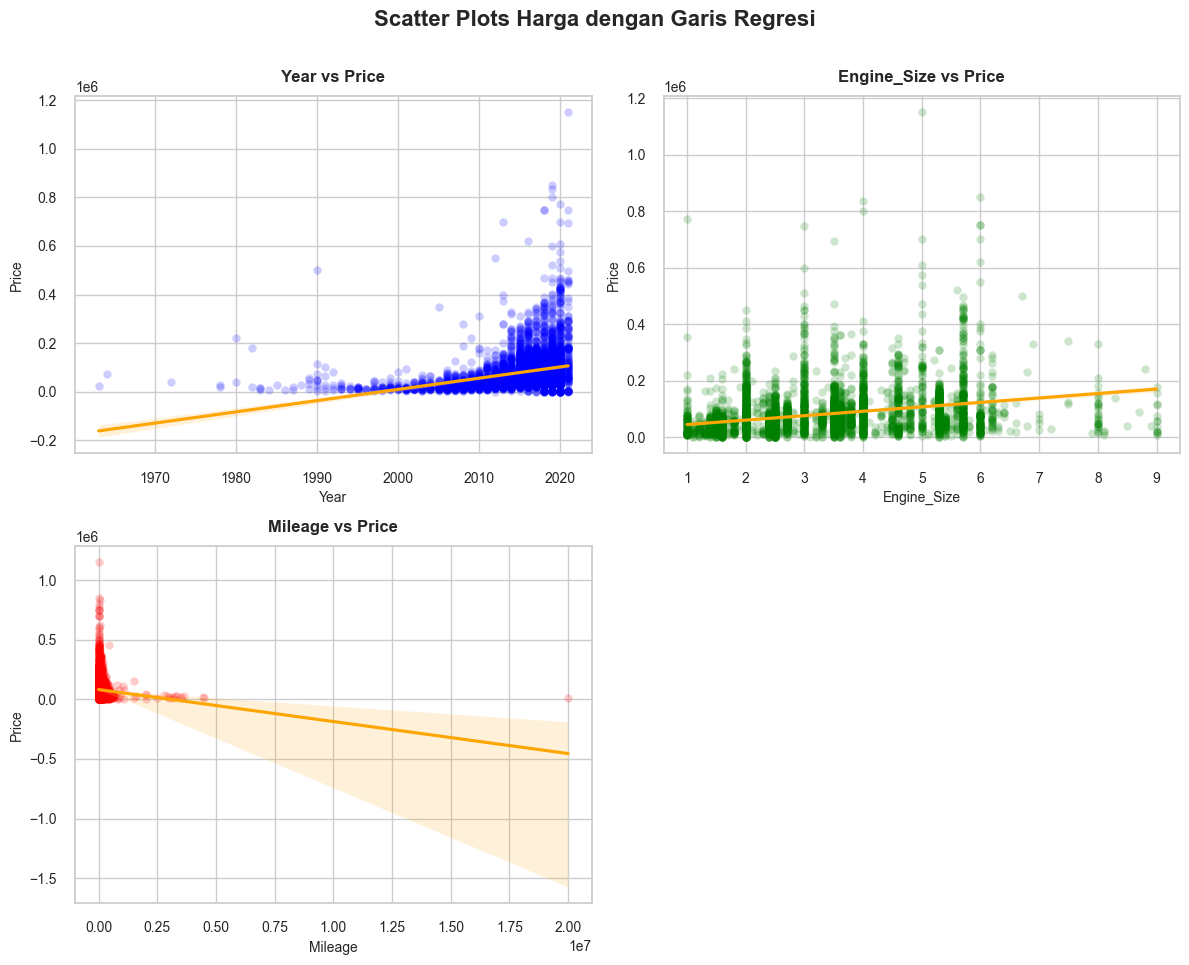

In [718]:
# Pilih kolom numerik yang relevan
numeric_columns = ['Year', 'Engine_Size', 'Mileage', 'Price']

# Pilih kolom numerik dari DataFrame
data = df_filled[numeric_columns]

# Membuat plot pencar (scatter plot) dengan garis regresi dalam grid 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Definisikan daftar warna untuk scatter plot
scatter_colors = ['blue', 'green', 'red', 'purple']

# Loop untuk membuat plot masing-masing variabel terhadap Price
for i, (col, color) in enumerate(zip(numeric_columns[:-1], scatter_colors)):
    sns.regplot(data=data, y='Price', x=col, ax=axes[i//2, i%2], 
                scatter_kws={'alpha': 0.2, 'color': color}, 
                line_kws={'color': 'orange'})
    axes[i//2, i%2].set_title(f'{col} vs Price', pad=10, fontweight='bold', fontsize=12)
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel("Price")

# Hapus subplot kosong pada baris dan kolom terakhir
fig.delaxes(axes[1, 1])

# Judul utama untuk keseluruhan figure
plt.suptitle('Scatter Plots Harga dengan Garis Regresi', fontsize=16, fontweight='bold')

# Tata letak yang rapi dengan ruang untuk judul
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

Insight:
1. Year vs Price:
> Terdapat korelasi positif antara Tahun dan Harga mobil. Semakin baru tahun mobil, semakin tinggi harga mobil tersebut. Namun, terlihat bahwa sebagian besar data terpusat pada mobil dengan tahun produksi yang lebih baru (2010 ke atas), yang menunjukkan bahwa harga mobil bekas dipengaruhi secara signifikan oleh usia kendaraan.

2. Engine_Size vs Price:
> Terdapat korelasi positif yang jelas antara Ukuran Mesin dan Harga mobil. Mobil dengan ukuran mesin yang lebih besar cenderung memiliki harga yang lebih tinggi. Hal ini menunjukkan bahwa konsumen mungkin lebih memilih mobil dengan mesin yang lebih besar, yang umumnya berhubungan dengan performa yang lebih baik, meskipun harga lebih mahal.

3. Mileage vs Price:
> Terdapat korelasi negatif yang jelas antara Jarak Tempuh dan Harga mobil. Semakin tinggi jarak tempuh (mileage), semakin rendah harga mobil tersebut. Ini mencerminkan bahwa mobil dengan jarak tempuh yang lebih tinggi cenderung memiliki nilai jual yang lebih rendah, karena dianggap lebih rentan terhadap kerusakan atau keausan.

### Barplot untuk Kolom Kategori

#### Data umum
1. Tipe Mobil terbanyak yang dijual

In [719]:
# Tipe mobil terbanyak yang dijual
Top_type = df_filled.groupby(["Make",'Type'])[['Type']].count()
Top_type =  Top_type.rename(columns={'Type': 'Count'})
Top_type= Top_type.sort_values(by="Count",ascending=False)
Top_type = Top_type.reset_index()
Top_type= Top_type.sort_values(by="Count",ascending=False)
Top_type.insert(0, 'Ranking', range(1,len(Top_type)+1))
Top_type = Top_type.set_index("Ranking")
Top_type = Top_type.head(5)
Top_type

,Make,Type,Count
Ranking,,,
1,Hyundai,Accent,212
2,Toyota,Camry,206
3,Toyota,Land Cruiser,202
4,Hyundai,Sonata,161
5,Toyota,Hilux,158


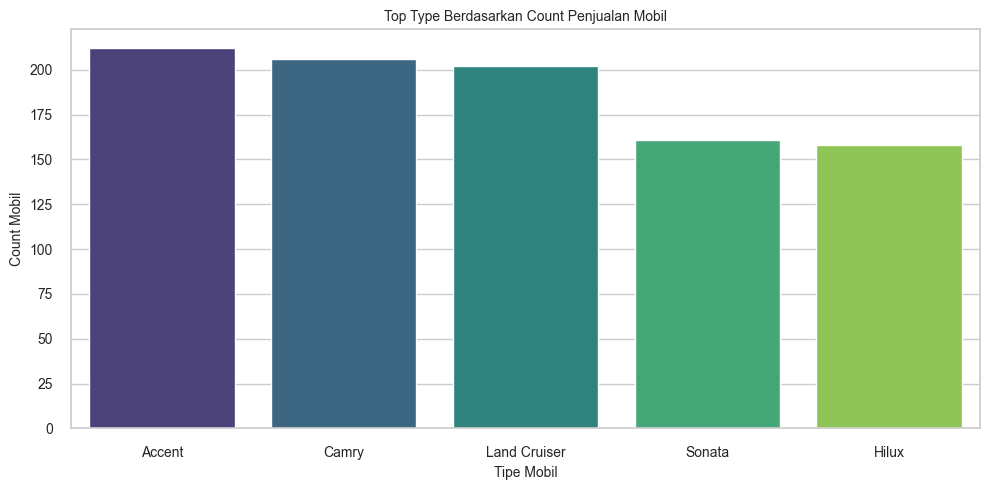

In [720]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Type', y='Count', data=Top_type, palette="viridis")
plt.title('Top Type Berdasarkan Count Penjualan Mobil')
plt.xlabel('Tipe Mobil')
plt.ylabel('Count Mobil')
plt.tight_layout()
plt.show()

1. **Top Tipe Mobil Berdasarkan Jumlah Penjualan**

* **Accent**, **Camry**, dan **Land Cruiser** merupakan tipe mobil dengan jumlah penjualan tertinggi, masing-masing dengan angka yang hampir sama.
* **Sonata** dan **Hilux** mengikuti dengan penjualan yang sedikit lebih rendah, menunjukkan bahwa jenis mobil seperti sedan dan SUV lebih diminati daripada tipe lainnya.

2. Region terbanyak penjualan mobil

In [721]:
df_filled["Region"]=df_filled["Region"].astype("object")

Top_region = df_filled.groupby(["Region"])[['Type']].count()
Top_region =  Top_region.rename(columns={'Type': 'Count'})
Top_region= Top_region.sort_values(by="Count",ascending=False)
Top_region = Top_region.reset_index()
Top_region= Top_region.sort_values(by="Count",ascending=False)
Top_region.insert(0, 'Ranking', range(1,len(Top_region)+1))
Top_region = Top_region.set_index("Ranking")
Top_region = Top_region.head(5)
Top_region


,Region,Count
Ranking,,
1,Riyadh,2315
2,Dammam,1141
3,Jeddah,786
4,Al-Medina,174
5,Qassim,160


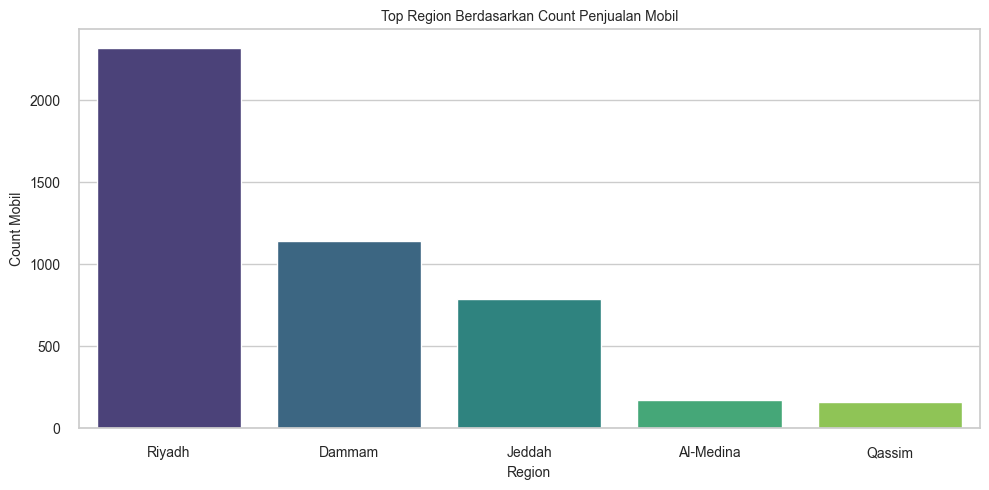

In [722]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Count', data=Top_region, palette="viridis")
plt.title('Top Region Berdasarkan Count Penjualan Mobil')
plt.xlabel('Region')
plt.ylabel('Count Mobil')
plt.tight_layout()
plt.show()

2. **Top Region Berdasarkan Jumlah Penjualan Mobil**

* **Riyadh** memiliki jumlah penjualan mobil yang sangat dominan, jauh melebihi **Dammam**, **Jeddah**, dan daerah lainnya.
* **Dammam** berada di posisi kedua, dengan penjualan yang jauh lebih rendah dari Riyadh, sementara **Jeddah**, **Al-Medina**, dan **Qassim** menunjukkan kontribusi yang lebih kecil terhadap total penjualan mobil.

3. Origin terbanyak penjualan mobil

In [723]:
df_filled["Origin"]=df_filled["Origin"].astype("object")

Top_Origin = df_filled.groupby(["Origin"])[['Type']].count()
Top_Origin =  Top_Origin.rename(columns={'Type': 'Count'})
Top_Origin= Top_Origin.sort_values(by="Count",ascending=False)
Top_Origin = Top_Origin.reset_index()
Top_Origin= Top_Origin.sort_values(by="Count",ascending=False)
Top_Origin.insert(0, 'Ranking', range(1,len(Top_Origin)+1))
Top_Origin = Top_Origin.set_index("Ranking")
Top_Origin

,Origin,Count
Ranking,,
1,Saudi,4172
2,Gulf Arabic,724
3,Other,643
4,Unknown,9


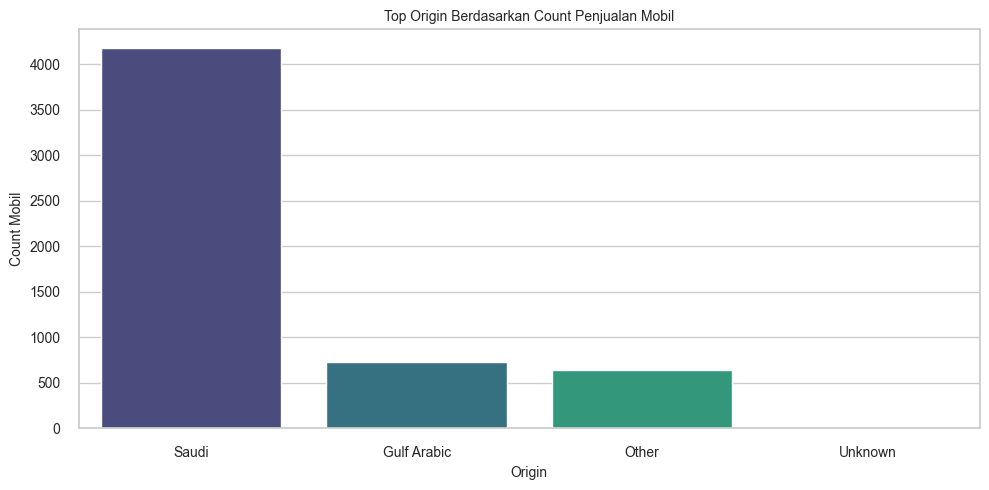

In [724]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Origin', y='Count', data=Top_Origin, palette="viridis")
plt.title('Top Origin Berdasarkan Count Penjualan Mobil')
plt.xlabel('Origin')
plt.ylabel('Count Mobil')
plt.tight_layout()
plt.show()

3. **Top Origin Berdasarkan Jumlah Penjualan Mobil**

* **Mobil asal Saudi** mencatatkan angka penjualan yang sangat signifikan, hampir mencapai 4.000 unit, yang menunjukkan bahwa mobil lokal mendominasi pasar.
* **Mobil asal Gulf Arabic** memiliki kontribusi yang lebih kecil, diikuti oleh kategori **Other** dan **Unknown**, yang menunjukkan bahwa pasar mobil bekas di Saudi Arabia didominasi oleh mobil domestik.

#### Analisis Terhadap harga

1.5. Tipe mobil Termahal

In [725]:
# 5 Tipe Termahal
Top_TypevsPrice = df_filled.groupby(['Type',"Make"])[['Price']].median()
Top_TypevsPrice =  Top_TypevsPrice.rename(columns={'Price': 'Median Price'})
Top_TypevsPrice= Top_TypevsPrice.sort_values(by="Median Price",ascending=False)
Top_TypevsPrice = Top_TypevsPrice.reset_index()
Top_TypevsPrice= Top_TypevsPrice.sort_values(by="Median Price",ascending=False)
Top_TypevsPrice.insert(0, 'Ranking', range(1,len(Top_TypevsPrice)+1))
Top_TypevsPrice = Top_TypevsPrice.set_index("Ranking")
Top_TypevsPrice = Top_TypevsPrice.head(5)
Top_TypevsPrice

,Type,Make,Median Price
Ranking,,,
1,Arnage,Bentley,"772,500.00"
2,Bentayga,Bentley,"750,000.00"
3,Ghost,Rolls-Royce,"620,000.00"
4,Camargue,Rolls-Royce,"500,000.00"
5,Defender,Land Rover,"450,000.00"


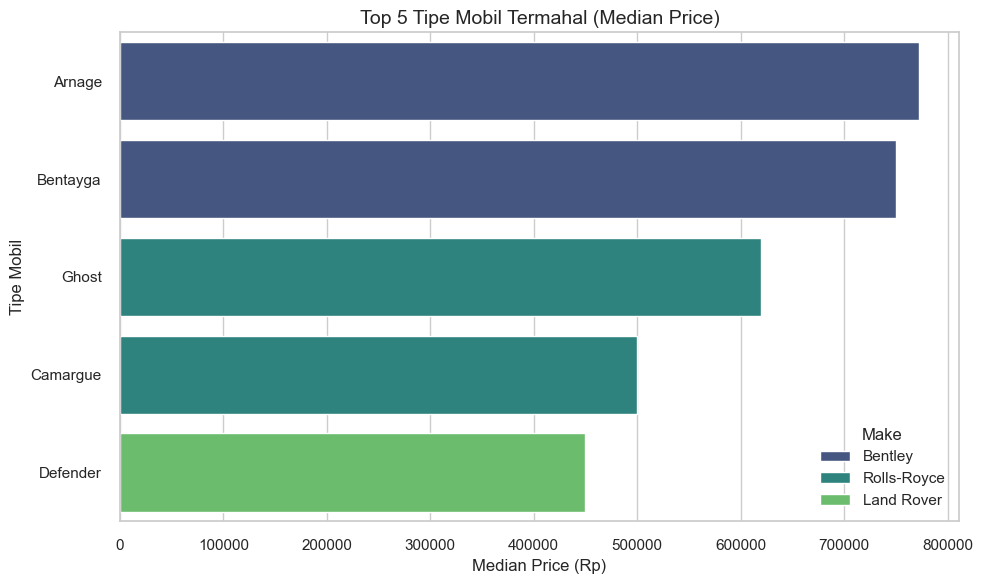

In [726]:
# Atur style visual
sns.set(style="whitegrid")

# Buat barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=Top_TypevsPrice,
    y="Type",
    x="Median Price",
    hue="Make",
    palette="viridis"
)

# Tambahkan label dan judul
plt.title("Top 5 Tipe Mobil Termahal (Median Price)", fontsize=14)
plt.xlabel("Median Price (Rp)", fontsize=12)
plt.ylabel("Tipe Mobil", fontsize=12)
plt.tight_layout()

# Tampilkan plot
plt.show()

Insight:

**Arnage**, **Bentayga**, **Ghost**, **Camargue**, dan **Defender** merupakan tipe mobil dengan harga jual tertinggi. Ini menunjukkan bahwa mobil-mobil mewah dan premium memiliki harga jual yang jauh lebih tinggi dibandingkan dengan tipe mobil lainnya, yang mencerminkan eksklusivitas dan kualitas tinggi dari tipe tersebut.

2.5. tipe mobil termurah

In [727]:
# 5 Tipe Termurah
Least_TypevsPrice = df_filled.groupby(['Type','Make'])[['Price']].median()
Least_TypevsPrice =  Least_TypevsPrice.rename(columns={'Price': 'Median Price'})
Least_TypevsPrice= Least_TypevsPrice.sort_values(by="Median Price",ascending=True)
Least_TypevsPrice = Least_TypevsPrice.reset_index()
Least_TypevsPrice= Least_TypevsPrice.sort_values(by="Median Price",ascending=True)
Least_TypevsPrice.insert(0, 'Ranking', range(1,len(Least_TypevsPrice)+1))
Least_TypevsPrice = Least_TypevsPrice.set_index("Ranking")
Least_TypevsPrice = Least_TypevsPrice.head(5)
Least_TypevsPrice

,Type,Make,Median Price
Ranking,,,
1,Wingle,Great Wall,"1,197.00"
2,Dyna,Toyota,"6,000.00"
3,Fabia,Škoda,"6,000.00"
4,DTS,Cadillac,"8,000.00"
5,Other,Fiat,"8,500.00"


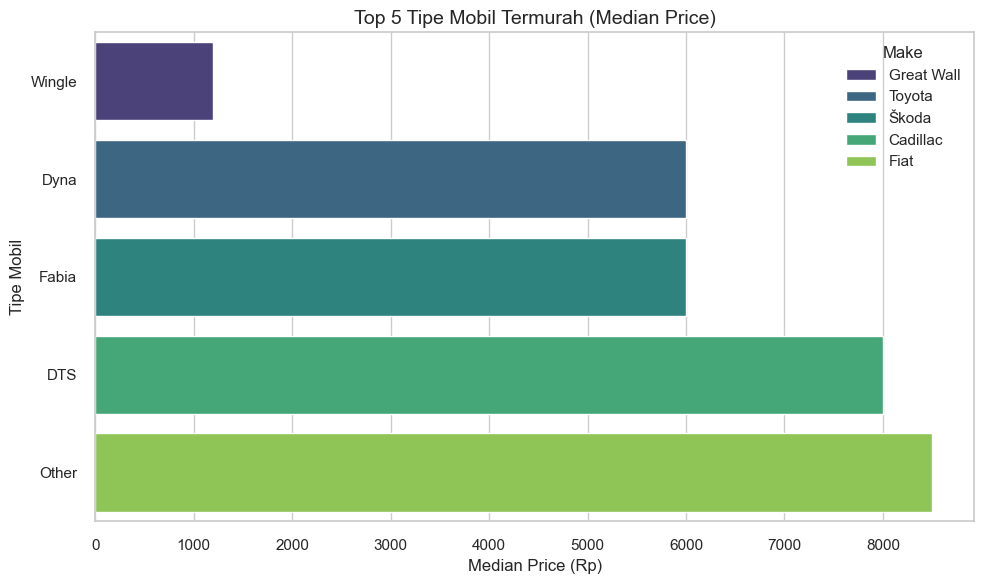

In [728]:
# Atur style visual
sns.set(style="whitegrid")

# Buat barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=Least_TypevsPrice,
    y="Type",
    x="Median Price",
    hue="Make",
    palette="viridis"
)

# Tambahkan label dan judul
plt.title("Top 5 Tipe Mobil Termurah (Median Price)", fontsize=14)
plt.xlabel("Median Price (Rp)", fontsize=12)
plt.ylabel("Tipe Mobil", fontsize=12)
plt.tight_layout()

# Tampilkan plot
plt.show()

Insight:

**Wingle**, **Dyna**, **Fabia**, **DTS**, dan **Other** adalah mobil dengan harga terendah. Tipe-tipe mobil ini lebih terjangkau, yang dapat menarik segmen pasar yang lebih besar, seperti pembeli yang mencari mobil dengan harga lebih terjangkau dan fungsional.

3.5. region termahal

In [729]:
# 5 Region Termahal
Top_RegionvsPrice = df_filled.groupby(['Region'])[['Price']].median()
Top_RegionvsPrice =  Top_RegionvsPrice.rename(columns={'Price': 'Median Price'})
Top_RegionvsPrice= Top_RegionvsPrice.sort_values(by="Median Price",ascending=False)
Top_RegionvsPrice = Top_RegionvsPrice.reset_index()
Top_RegionvsPrice= Top_RegionvsPrice.sort_values(by="Median Price",ascending=False)
Top_RegionvsPrice.insert(0, 'Ranking', range(1,len(Top_RegionvsPrice)+1))
Top_RegionvsPrice = Top_RegionvsPrice.set_index("Ranking")
Top_RegionvsPrice = Top_RegionvsPrice.head(5)
Top_RegionvsPrice

,Region,Median Price
Ranking,,
1,Dammam,"69,000.00"
2,Riyadh,"60,000.00"
3,Qassim,"60,000.00"
4,Hail,"55,000.00"
5,Jeddah,"55,000.00"


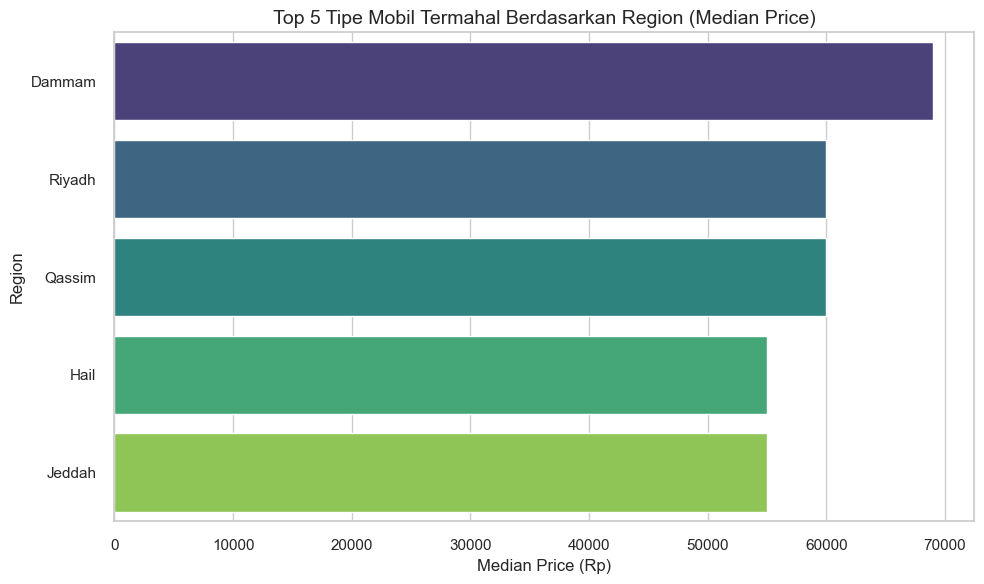

In [730]:
# Atur style visual
sns.set(style="whitegrid")

# Buat barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=Top_RegionvsPrice,
    y="Region",
    x="Median Price",
    hue="Region",
    palette="viridis"
)

# Tambahkan label dan judul
plt.title("Top 5 Tipe Mobil Termahal Berdasarkan Region (Median Price)", fontsize=14)
plt.xlabel("Median Price (Rp)", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.tight_layout()

# Tampilkan plot
plt.show()

Insight:

**Dammam**, **Riydah**, **Qassim**, **Hail**, dan **Jeddah** memiliki harga jual mobil tertinggi, yang mungkin dipengaruhi oleh daya beli yang lebih tinggi di daerah tersebut atau permintaan untuk mobil-mobil premium. Riyadh, sebagai ibu kota, kemungkinan memiliki konsentrasi tinggi mobil mewah.

4.5. region termurah

In [731]:
# 5 Region Termurah
Least_RegionvsPrice = df_filled.groupby(['Region'])[['Price']].median()
Least_RegionvsPrice =  Least_RegionvsPrice.rename(columns={'Price': 'Median Price'})
Least_RegionvsPrice= Least_RegionvsPrice.sort_values(by="Median Price",ascending=True)
Least_RegionvsPrice = Least_RegionvsPrice.reset_index()
Least_RegionvsPrice= Least_RegionvsPrice.sort_values(by="Median Price",ascending=True)
Least_RegionvsPrice.insert(0, 'Ranking', range(1,len(Least_RegionvsPrice)+1))
Least_RegionvsPrice = Least_RegionvsPrice.set_index("Ranking")
Least_RegionvsPrice = Least_RegionvsPrice.head(5)
Least_RegionvsPrice

,Region,Median Price
Ranking,,
1,Sabya,"17,000.00"
2,Najran,"30,000.00"
3,Arar,"35,500.00"
4,Tabouk,"36,000.00"
5,Al-Jouf,"37,000.00"


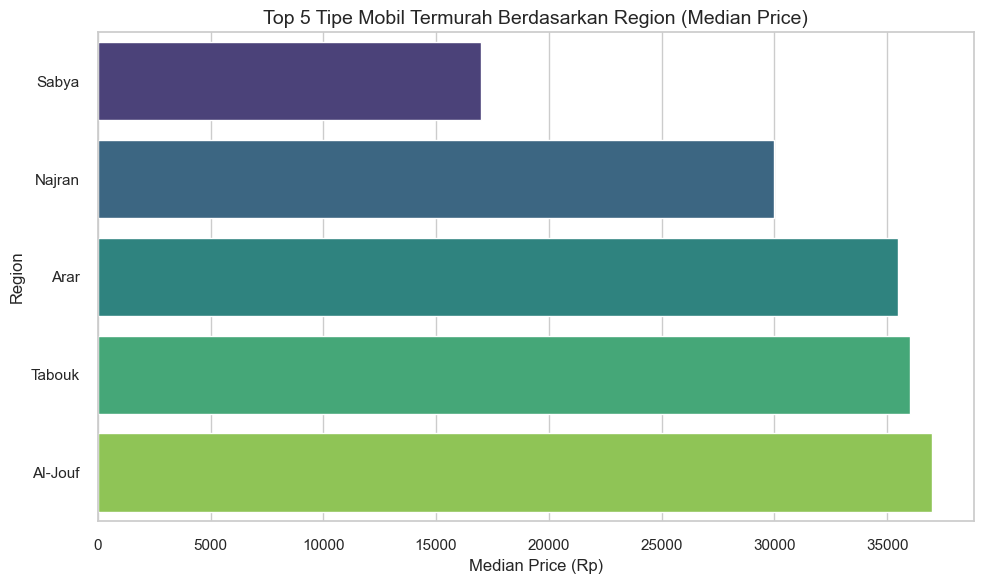

In [732]:
# Atur style visual
sns.set(style="whitegrid")

# Buat barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=Least_RegionvsPrice,
    y="Region",
    x="Median Price",
    hue="Region",
    palette="viridis"
)

# Tambahkan label dan judul
plt.title("Top 5 Tipe Mobil Termurah Berdasarkan Region (Median Price)", fontsize=14)
plt.xlabel("Median Price (Rp)", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.tight_layout()

# Tampilkan plot
plt.show()

Insight:

**Sabya**, **Najran**, **Arar**, **Tabouk**, dan **Al-Jouf** memiliki harga jual mobil yang lebih rendah. Ini bisa mencerminkan pasar dengan daya beli yang lebih rendah atau lebih banyak pilihan mobil dengan harga terjangkau di wilayah tersebut.

5.5. harga berdasarkan jenis bahan bakar

In [733]:
# Jenis Bahan Bakar
Top_FuelvsPrice = df_filled.groupby(['Fuel_Type'])[['Price']].median()
Top_FuelvsPrice =  Top_FuelvsPrice.rename(columns={'Price': 'Median Price'})
Top_FuelvsPrice= Top_FuelvsPrice.sort_values(by="Median Price",ascending=False)
Top_FuelvsPrice = Top_FuelvsPrice.reset_index()
Top_FuelvsPrice= Top_FuelvsPrice.sort_values(by="Median Price",ascending=False)
Top_FuelvsPrice.insert(0, 'Ranking', range(1,len(Top_FuelvsPrice)+1))
Top_FuelvsPrice = Top_FuelvsPrice.set_index("Ranking")
Top_FuelvsPrice = Top_FuelvsPrice.head(10)
Top_FuelvsPrice

,Fuel_Type,Median Price
Ranking,,
1,Hybrid,"110,000.00"
2,Diesel,"68,500.00"
3,Gas,"58,000.00"


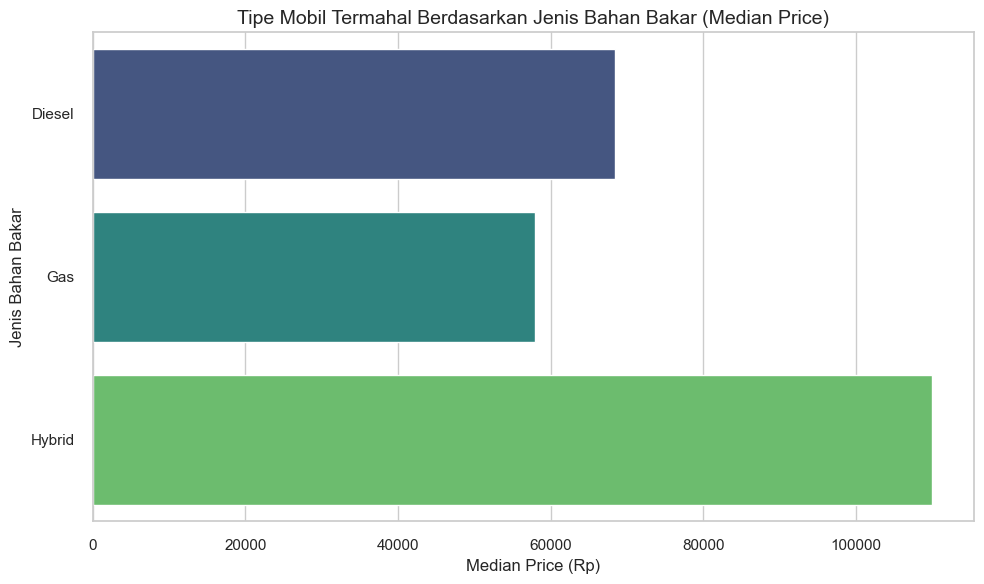

In [783]:
# Atur style visual
sns.set(style="whitegrid")

# Buat barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=Top_FuelvsPrice,
    y="Fuel_Type",
    x="Median Price",
    hue="Fuel_Type",
    palette="viridis"
)

# Tambahkan label dan judul
plt.title("Tipe Mobil Termahal Berdasarkan Jenis Bahan Bakar (Median Price)", fontsize=14)
plt.xlabel("Median Price (Rp)", fontsize=12)
plt.ylabel("Jenis Bahan Bakar", fontsize=12)
plt.tight_layout()

# Tampilkan plot
plt.show()

Insight:

* **Hybrid** memiliki harga yang jauh lebih tinggi dibandingkan dengan **Diesel** dan **Gas**. Ini mencerminkan bahwa mobil hybrid lebih mahal, mungkin karena teknologi ramah lingkungan dan efisiensi bahan bakar yang lebih baik.
* **Diesel** dan **Gas** memiliki harga yang lebih rendah, yang menunjukkan bahwa mobil berbahan bakar konvensional cenderung lebih terjangkau.

6.5. harga berdasarkan transmisi

In [735]:
Top_GearvsPrice = df_filled.groupby(['Gear_Type'])[['Price']].median()
Top_GearvsPrice =  Top_GearvsPrice.rename(columns={'Price': 'Median Price'})
Top_GearvsPrice= Top_GearvsPrice.sort_values(by="Median Price",ascending=False)
Top_GearvsPrice = Top_GearvsPrice.reset_index()
Top_GearvsPrice= Top_GearvsPrice.sort_values(by="Median Price",ascending=False)
Top_GearvsPrice.insert(0, 'Ranking', range(1,len(Top_GearvsPrice)+1))
Top_GearvsPrice = Top_GearvsPrice.set_index("Ranking")
Top_GearvsPrice = Top_GearvsPrice.head(10)
Top_GearvsPrice

,Gear_Type,Median Price
Ranking,,
1,Automatic,"59,000.00"
2,Manual,"45,000.00"


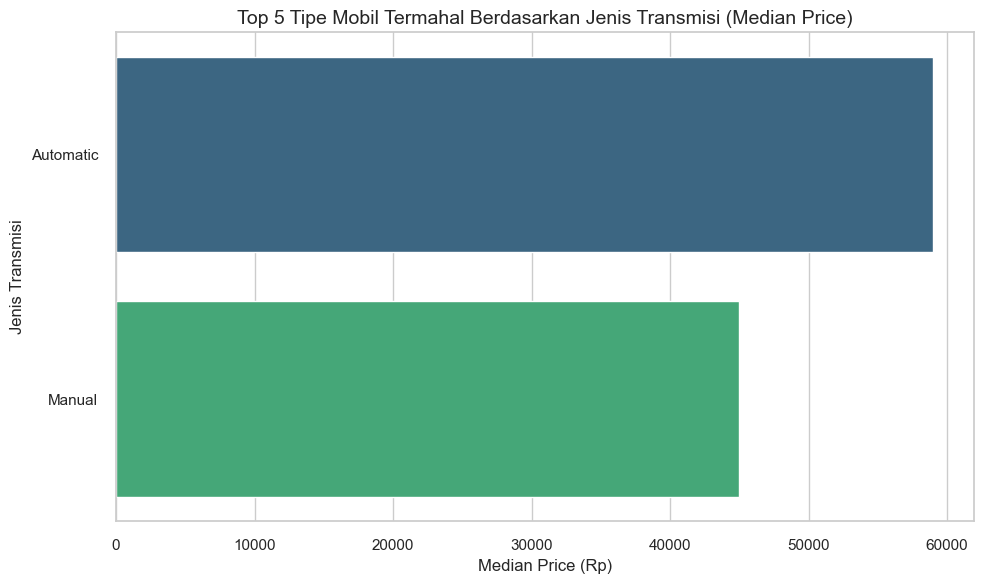

In [736]:
# Atur style visual
sns.set(style="whitegrid")

# Buat barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=Top_GearvsPrice,
    y="Gear_Type",
    x="Median Price",
    hue="Gear_Type",
    palette="viridis"
)

# Tambahkan label dan judul
plt.title("Top 5 Tipe Mobil Termahal Berdasarkan Jenis Transmisi (Median Price)", fontsize=14)
plt.xlabel("Median Price (Rp)", fontsize=12)
plt.ylabel("Jenis Transmisi", fontsize=12)
plt.tight_layout()

# Tampilkan plot
plt.show()

Insight:

 **Automatic** transmisi lebih mahal dibandingkan **Manual** transmisi. Hal ini mungkin terkait dengan kenyamanan dan kemudahan berkendara yang ditawarkan oleh transmisi otomatis, yang lebih populer di kalangan pembeli premium.

7.5. harga termahal terhadap tahun

In [737]:
Top_YearvsPrice = df_filled.groupby(['Year'])[['Price']].median()
Top_YearvsPrice =  Top_YearvsPrice.rename(columns={'Price': 'Median Price'})
Top_YearvsPrice= Top_YearvsPrice.sort_values(by="Median Price",ascending=False)
Top_YearvsPrice = Top_YearvsPrice.reset_index()
Top_YearvsPrice= Top_YearvsPrice.sort_values(by="Median Price",ascending=False)
Top_YearvsPrice.insert(0, 'Ranking', range(1,len(Top_YearvsPrice)+1))
Top_YearvsPrice = Top_YearvsPrice.set_index("Ranking")
Top_YearvsPrice = Top_YearvsPrice.head(5)
Top_YearvsPrice

,Year,Median Price
Ranking,,
1,1980,"130,000.00"
2,2021,"121,000.00"
3,2020,"100,000.00"
4,1982,"99,000.00"
5,1964,"75,000.00"


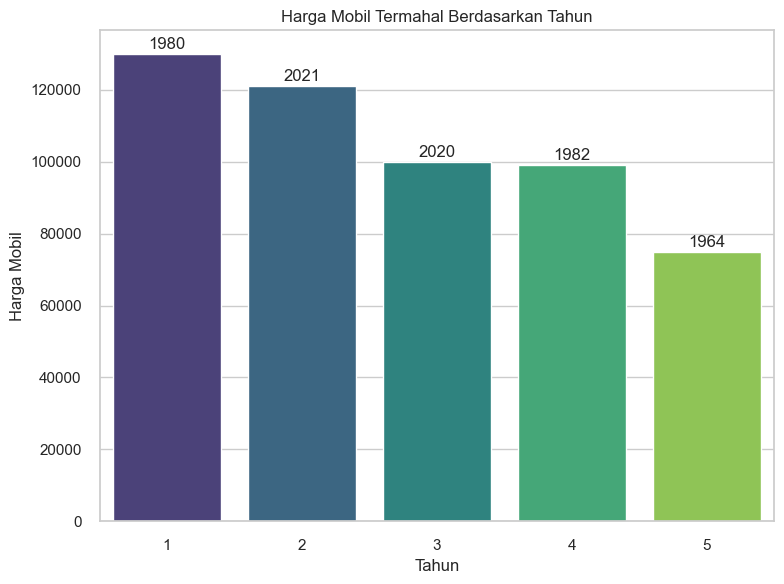

In [738]:
# Barplot tunggal
plt.figure(figsize=(8, 6))
sns.barplot(x=Top_YearvsPrice.index, y='Median Price', data=Top_YearvsPrice, palette="viridis")

# Tambahkan label tahun di atas batang
for i in range(len(Top_YearvsPrice)):
    plt.text(
        i,
        Top_YearvsPrice['Median Price'].iloc[i] + 500,
        Top_YearvsPrice['Year'].iloc[i],
        ha='center', va='bottom', fontsize=12
    )

# Tambahkan label dan judul
plt.title('Harga Mobil Termahal Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Harga Mobil')
plt.tight_layout()
plt.show()

Insight:

**1980** adalah tahun dengan harga mobil tertinggi, diikuti oleh **2021**, **2020**, **1982**, dan **1964**. Ini menunjukkan bahwa mobil tahun baru memiliki harga yang lebih tinggi, yang konsisten dengan tren pasar, di mana mobil baru biasanya lebih mahal daripada model tahun sebelumnya.

8.5. harga termurah terhadap tahun

In [739]:
least_YearvsPrice = df_filled.groupby(['Year'])[['Price']].median()
least_YearvsPrice =  least_YearvsPrice.rename(columns={'Price': 'Median Price'})
least_YearvsPrice= least_YearvsPrice.sort_values(by="Median Price",ascending=True)
least_YearvsPrice = least_YearvsPrice.reset_index()
least_YearvsPrice= least_YearvsPrice.sort_values(by="Median Price",ascending=True)
least_YearvsPrice.insert(0, 'Ranking', range(1,len(least_YearvsPrice)+1))
least_YearvsPrice = least_YearvsPrice.set_index("Ranking")
least_YearvsPrice = least_YearvsPrice.head(5)
least_YearvsPrice

,Year,Median Price
Ranking,,
1,1986,"5,500.00"
2,1984,"7,000.00"
3,1996,"10,000.00"
4,1994,"11,000.00"
5,2002,"13,000.00"


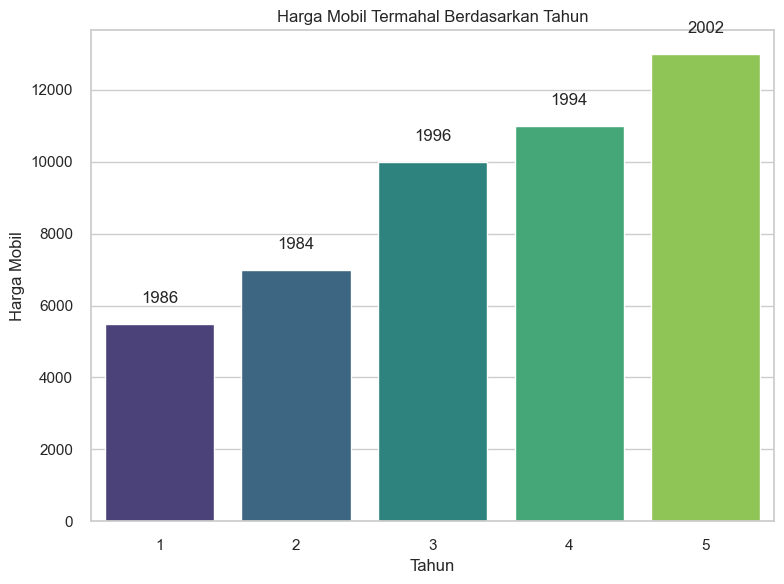

In [740]:
# Barplot tunggal
plt.figure(figsize=(8, 6))
sns.barplot(x=least_YearvsPrice.index, y='Median Price', data=least_YearvsPrice, palette="viridis")

# Tambahkan label tahun di atas batang
for i in range(len(least_YearvsPrice)):
    plt.text(
        i,
        least_YearvsPrice['Median Price'].iloc[i] + 500,
        least_YearvsPrice['Year'].iloc[i],
        ha='center', va='bottom', fontsize=12
    )

# Tambahkan label dan judul
plt.title('Harga Mobil Termahal Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Harga Mobil')
plt.tight_layout()
plt.show()

Insight:

**1986**, **1984**, **1996**, **1994**, dan **2002** memiliki harga mobil yang lebih rendah, yang menunjukkan bahwa mobil-mobil dengan usia lebih tua cenderung lebih terjangkau. Hal ini disebabkan oleh depresiasi nilai mobil yang lebih cepat seiring bertambahnya usia mobil.

### Cek Distribusi Data Numerik

In [741]:
# Ubah format tampilan float: tanpa scientific notation, 2 desimal
pd.options.display.float_format = '{:,.2f}'.format

# Tampilkan deskripsi ulang
print(df_filled.describe())

          Year  Engine_Size       Mileage        Price
count 5,548.00     5,548.00      5,548.00     5,548.00
mean  2,014.85         3.15    140,139.50    78,578.16
std       5.08         1.48    336,825.03    76,018.41
min   1,963.00         1.00        100.00         0.00
25%   2,013.00         2.00     46,362.00    35,000.00
50%   2,016.00         2.70    100,414.50    58,000.00
75%   2,018.00         4.00    180,000.00    95,000.00
max   2,021.00         9.00 20,000,000.00 1,150,000.00


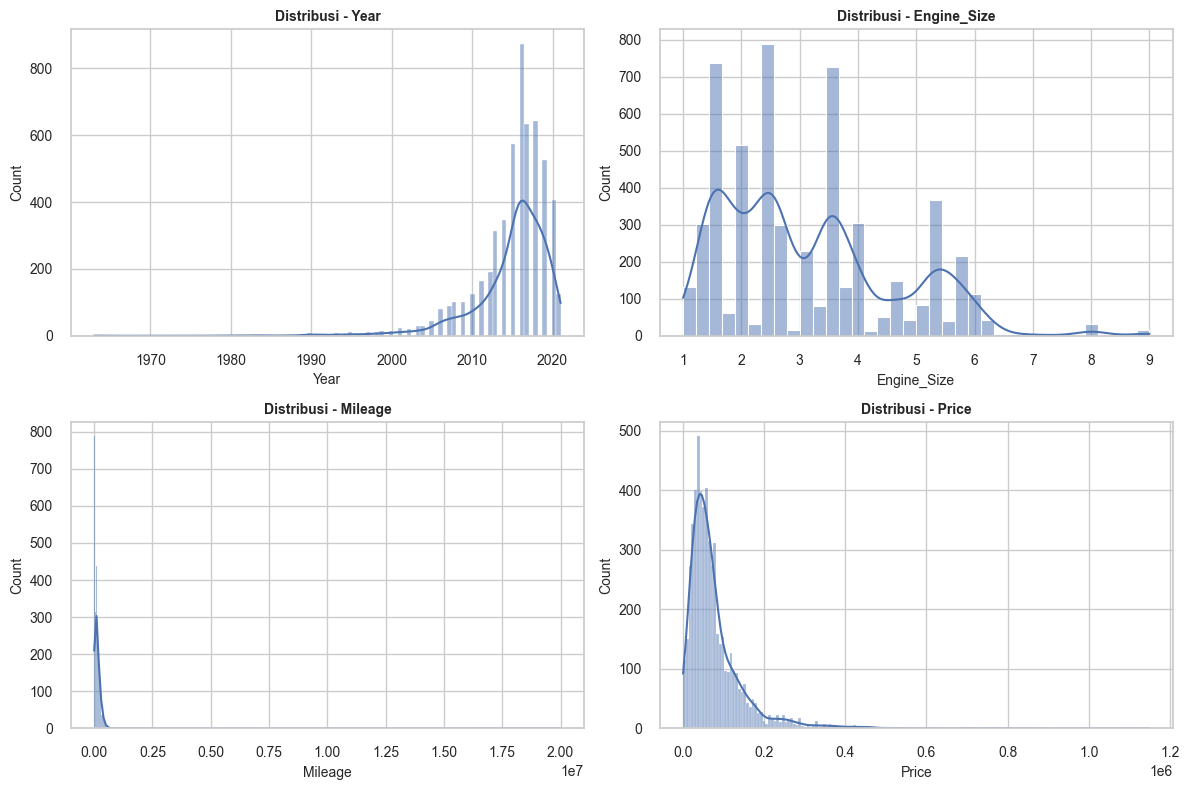

In [742]:
# Identifikasi kolom numerikal
numerical_columns = df_filled.select_dtypes(include=['int64', 'float64']).columns

# Atur ukuran font default
plt.rcParams.update({
    'font.size': 10,             # Ukuran font umum
    'axes.titlesize': 10,        # Ukuran judul grafik
    'axes.labelsize': 10,        # Ukuran label sumbu
    'xtick.labelsize': 10,       # Ukuran angka pada sumbu X
    'ytick.labelsize': 10,       # Ukuran angka pada sumbu Y
    'figure.titlesize': 20       # Ukuran judul figure (jika ada)
})

# Misal numerical_columns adalah list kolom numerik
num_cols = len(numerical_columns)
cols = 2  # Jumlah kolom per baris
rows = math.ceil(num_cols / cols)  # Hitung jumlah baris yang dibutuhkan

plt.figure(figsize=(12, rows * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=df_filled, x=col, kde=True)
    plt.title(f'Distribusi - {col}', fontweight='bold')

plt.tight_layout()
plt.show()

Insight:

1. Distribusi Tahun (Year):
> Terlihat bahwa sebagian besar mobil dalam dataset ini diproduksi setelah tahun 2010, dengan puncak distribusi di sekitar tahun 2020. Ini menunjukkan bahwa mobil bekas yang lebih baru mendominasi pasar, dan mobil yang lebih tua (sebelum tahun 2000) jauh lebih sedikit ditemukan.

2. Distribusi Ukuran Mesin (Engine Size):
> Ukuran mesin sebagian besar terkonsentrasi pada nilai yang lebih kecil, terutama antara 1 hingga 3 liter, dengan penurunan tajam pada ukuran mesin yang lebih besar. Ini menunjukkan bahwa mayoritas mobil dalam dataset ini memiliki mesin kecil hingga sedang, sementara mobil dengan mesin besar lebih jarang.

3. Distribusi Jarak Tempuh (Mileage):
> Jarak tempuh menunjukkan distribusi yang sangat miring ke kiri, dengan sebagian besar mobil memiliki jarak tempuh yang rendah. Puncak distribusi berada di sekitar 0 hingga 100.000 km, menunjukkan bahwa mobil-mobil yang relatif baru atau dengan sedikit penggunaan lebih banyak ditemukan dalam dataset ini.

4. Distribusi Harga (Price):
> Harga mobil bekas menunjukkan distribusi yang sangat miring ke kiri, dengan mayoritas harga mobil berada pada kisaran yang lebih rendah, tetapi terdapat beberapa harga yang jauh lebih tinggi. Ini menunjukkan bahwa meskipun sebagian besar mobil memiliki harga yang relatif terjangkau, ada juga sejumlah mobil premium atau mobil dengan harga lebih tinggi, yang dapat dipengaruhi oleh faktor seperti merek, model, atau kondisi mobil.

### Cek Outliers

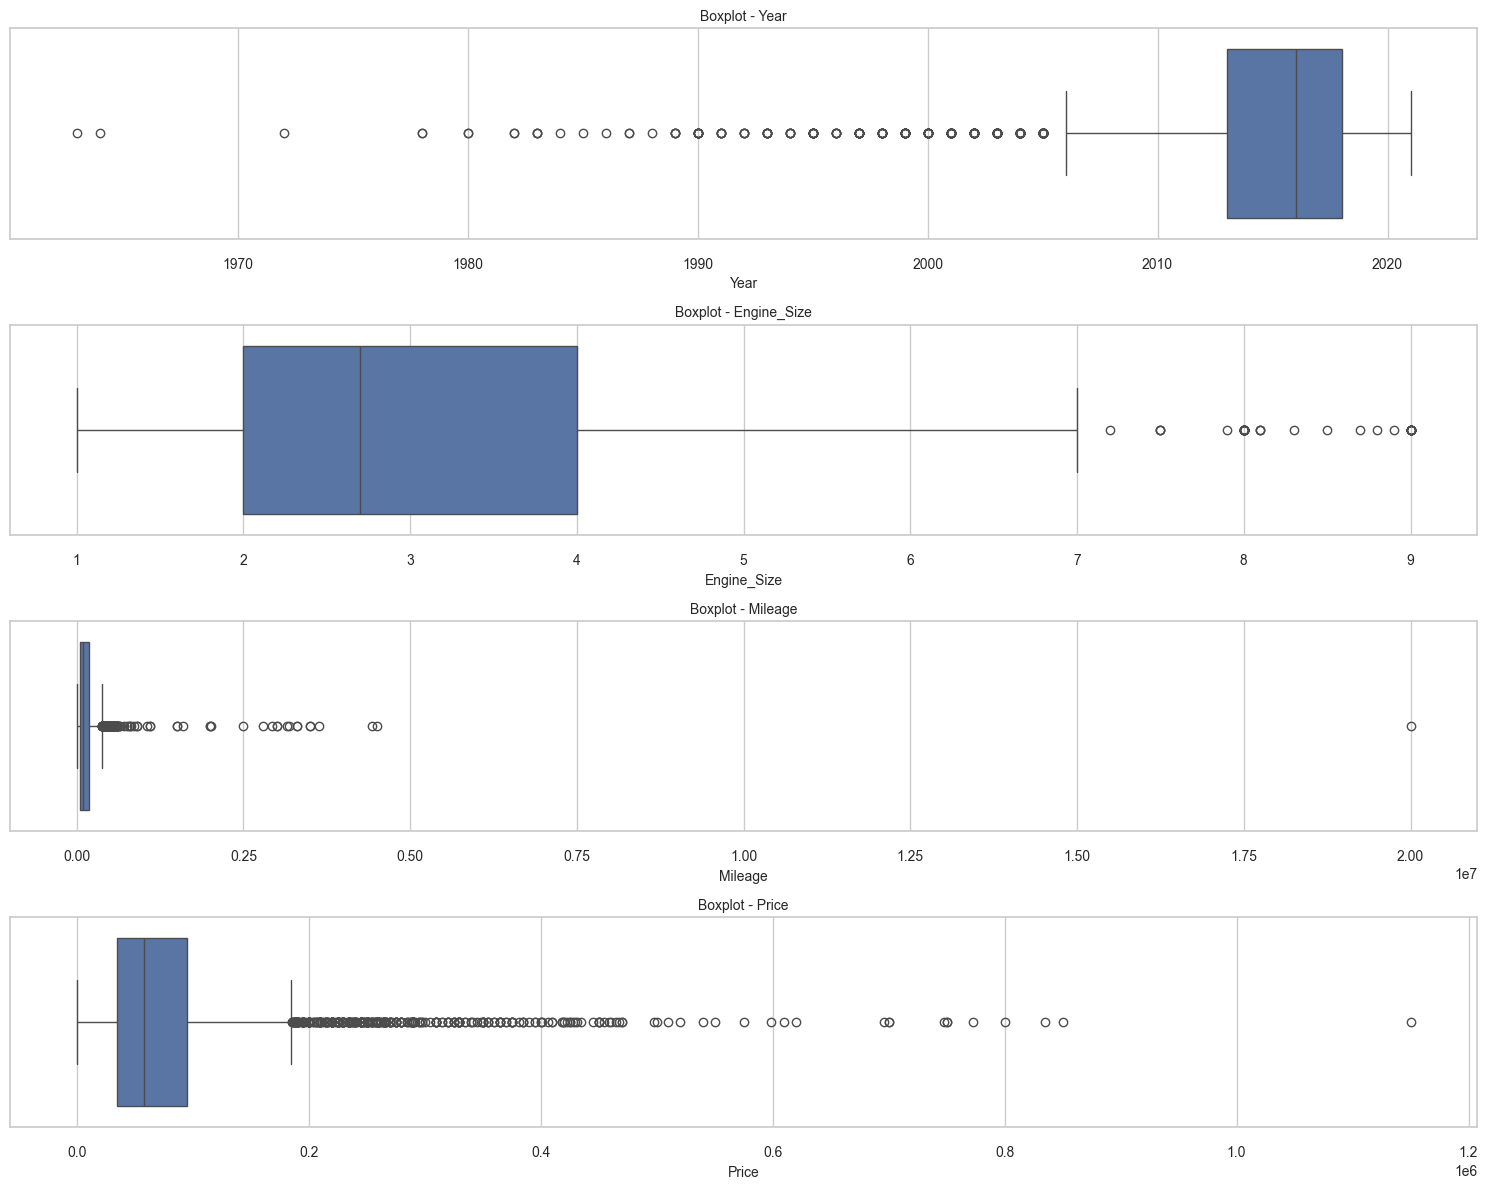

In [744]:
# Identifikasi kolom numerikal
numerical_columns = df_filled.select_dtypes(include=['int64', 'float64']).columns

# Boxplots untuk semua kolom numerik
plt.figure(figsize=(15, len(numerical_columns) * 3))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df_filled, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

Insight:

1. Tahun (Year):
> Sebagian besar mobil dalam dataset ini diproduksi setelah tahun 2000, dengan konsentrasi terbesar pada tahun 2010 hingga 2020. Terdapat beberapa nilai outlier, namun secara umum, distribusi tahun relatif terpusat pada periode tersebut.

2. Ukuran Mesin (Engine Size):
> Ukuran mesin mobil cenderung terpusat pada kisaran 2 hingga 4 liter, dengan beberapa outlier yang memiliki ukuran mesin lebih besar, terutama di atas 6 liter. Hal ini menunjukkan bahwa mobil dengan ukuran mesin besar lebih jarang ditemukan dalam dataset ini.

3. Jarak Tempuh (Mileage):
> Distribusi mileage menunjukkan bahwa sebagian besar mobil memiliki jarak tempuh yang sangat rendah, dengan beberapa nilai outlier di angka yang sangat tinggi (mencapai 1 juta km). Boxplot menunjukkan adanya konsentrasi mobil dengan jarak tempuh rendah, namun ada sejumlah mobil dengan jarak tempuh yang sangat tinggi, kemungkinan besar mobil yang sudah lama digunakan atau kurang terawat.

4. Harga (Price):
> Harga mobil bekas menunjukkan variasi yang signifikan, dengan sebagian besar harga terpusat pada angka rendah, tetapi terdapat beberapa outlier dengan harga yang sangat tinggi (mencapai lebih dari 1 juta SAR). Hal ini mencerminkan adanya mobil dengan harga premium atau mobil dengan fitur tertentu yang memiliki harga jauh lebih tinggi dibandingkan dengan sebagian besar mobil lainnya.

In [745]:
# Dictionary kosong untuk menyimpan info
outliers_info = {}

# Menghitung Q1, Q3, dan IQR untuk setiap kolom numerik
for column in numerical_columns:
    Q1 = df_filled[column].quantile(0.25)
    Q3 = df_filled[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas bawah dan atas (mild outlier)
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Menghitung batas ekstrem bawah dan atas
    batas_ekstrem_bawah = Q1 - 3 * IQR
    batas_ekstrem_atas = Q3 + 3 * IQR

    # Mengidentifikasi outlier dan outlier ekstrem
    kondisi_outlier = (df_filled[column] < batas_bawah) | (df_filled[column] > batas_atas)
    kondisi_outlier_ekstrem_atas = df_filled[column] > batas_ekstrem_atas
    kondisi_outlier_ekstrem_bawah = df_filled[column] < batas_ekstrem_bawah

    outlier = df_filled[kondisi_outlier]
    outlier_ekstrem = df_filled[kondisi_outlier_ekstrem_atas | kondisi_outlier_ekstrem_bawah]

    # Menyimpan informasi ke dictionary
    outliers_info[column] = {
        'batas_bawah': batas_bawah,
        'batas_atas': batas_atas,
        'batas_ekstrem_bawah': batas_ekstrem_bawah,
        'batas_ekstrem_atas': batas_ekstrem_atas,
        'jumlah_outlier': kondisi_outlier.sum(),
        'jumlah_outlier_ekstrem_atas': kondisi_outlier_ekstrem_atas.sum(),
        'jumlah_outlier_ekstrem_bawah': kondisi_outlier_ekstrem_bawah.sum(),
        'indeks_outlier': outlier.index.tolist(),
        'indeks_outlier_ekstrem': outlier_ekstrem.index.tolist()
    }

# Ringkasan outliers
outliers_summary = {
    key: {
        'batas_bawah': value['batas_bawah'],
        'batas_atas': value['batas_atas'],
        'batas_ekstrem_bawah': value['batas_ekstrem_bawah'],
        'batas_ekstrem_atas': value['batas_ekstrem_atas'],
        'jumlah_outlier': value['jumlah_outlier'],
        'jumlah_outlier_ekstrem_bawah': value['jumlah_outlier_ekstrem_bawah'],
        'jumlah_outlier_ekstrem_atas': value['jumlah_outlier_ekstrem_atas']
    }
    for key, value in outliers_info.items()
}

# Membuat DataFrame ringkasan
df_summary = pd.DataFrame.from_dict(outliers_summary, orient='index')

# Mengatur urutan kolom
df_summary = df_summary[[
    'batas_bawah',
    'batas_atas',
    'batas_ekstrem_bawah',
    'batas_ekstrem_atas',
    'jumlah_outlier',
    'jumlah_outlier_ekstrem_bawah',
    'jumlah_outlier_ekstrem_atas'
]]

# Menampilkan ringkasan
df_summary

,batas_bawah,batas_atas,batas_ekstrem_bawah,batas_ekstrem_atas,jumlah_outlier,jumlah_outlier_ekstrem_bawah,jumlah_outlier_ekstrem_atas
Year,"2,005.50","2,025.50","1,998.00","2,033.00",260,79,0
Engine_Size,-1.00,7.00,-4.00,10.00,54,0,0
Mileage,"-154,095.00","380,457.00","-354,552.00","580,914.00",196,0,46
Price,"-55,000.00","185,000.00","-145,000.00","275,000.00",356,0,141


#### Kolom Year

Data mobil dengan tahun produksi sebelum 2005 akan dihapus karena alasan-alasan berikut:

1. Kendaraan sebelum 2005 umumnya tidak merepresentasikan pasar mobil bekas konvensional yang ditujukan untuk pengguna umum, melainkan kendaraan yang sudah berusia tua dan cenderung kurang diminati oleh konsumen yang mencari mobil bekas yang lebih baru dan dengan fitur yang lebih modern.

2. Kehadiran kendaraan yang lebih tua dari 2005 dapat mengganggu distribusi data, serta mempengaruhi perhitungan statistik seperti rata-rata usia kendaraan dan parameter regresi dalam model prediksi. Kendaraan yang lebih tua cenderung memiliki karakteristik yang berbeda dalam hal harga, pemeliharaan, dan kinerja dibandingkan dengan kendaraan yang lebih baru.

3. Mobil sebelum tahun 2005 memiliki perbedaan signifikan dalam hal teknologi, efisiensi, dan fitur keselamatan, yang menyulitkan normalisasi data dan pemodelan berbasis fitur. Seiring dengan kemajuan teknologi, mobil yang lebih baru memiliki fitur yang lebih canggih, sehingga perbandingan antar kendaraan bisa jadi tidak relevan.

4. Mobil yang lebih dari 20 tahun umumnya tidak lagi aktif diperdagangkan dalam jumlah besar, sehingga kehadirannya dalam dataset dapat menyebabkan bias dalam analisis yang seharusnya berfokus pada mobil dengan permintaan pasar yang aktif dan relevan di pasar mobil bekas saat ini

Dengan demikian, data mobil sebelum 2005 akan dihapus untuk memastikan analisis dan pemodelan lebih akurat dan relevan.


In [746]:
# drop data di tahun < 2008
df_filled = df_filled[df_filled['Year'] > df_summary['batas_bawah'][0]]

#### Kolom Mileage

Data mobil dengan nilai **Mileage** di atas `380,457 km` akan dihapus dari dataset berdasarkan pertimbangan-pertimbangan berikut:

1. **Mobil dengan jarak tempuh ekstrem (di atas 380.457 km) merupakan anomali** yang tidak mencerminkan kondisi mayoritas kendaraan di pasar mobil bekas. Nilai ini jauh di luar distribusi umum dan dapat mengganggu kestabilan model prediktif serta representasi data secara umum.

2. **Jarak tempuh yang sangat tinggi berpotensi merepresentasikan kendaraan yang digunakan untuk keperluan komersial intensif**, seperti taksi, logistik, atau operasional bisnis. Hal ini membuat kendaraan tersebut memiliki karakteristik berbeda dalam hal depresiasi nilai, kebutuhan perawatan, dan umur pakai dibandingkan kendaraan pribadi konvensional.

3. Kehadiran data ekstrem pada kolom Mileage dapat menyebabkan **distorsi dalam penghitungan statistik deskriptif**, seperti rata-rata dan deviasi standar, yang pada akhirnya memengaruhi performa dan akurasi model regresi maupun klasifikasi yang sensitif terhadap outlier.

4. **Mobil dengan mileage sangat tinggi umumnya memiliki nilai pasar yang rendah dan permintaan terbatas**, sehingga keberadaannya dalam dataset bisa menyebabkan model terlalu fokus pada segmen kendaraan yang kurang relevan dengan kebutuhan pasar mobil bekas secara umum.

Dengan demikian, penghapusan mobil dengan **Mileage lebih dari 380.457 km** dilakukan untuk menjaga kualitas data, mengurangi noise, serta memastikan bahwa analisis dan pemodelan yang dilakukan tetap akurat, representatif, dan relevan terhadap kondisi pasar mobil bekas yang aktif.


In [747]:
# drop outlier Mileage
df_filled = df_filled[df_filled['Mileage'] <= df_summary['batas_atas'][2]]

#### Kolom Engine Size

Penghapusan data dengan `Engine Size` lebih dari 7.0 L dilakukan dengan pertimbangan berikut:

1. Sebagian besar mobil memiliki ukuran mesin antara 2.0 hingga 4.0 L, dengan puncak di sekitar 3.0 L. Temuan mesin lebih dari 7.0 L, terutama mencapai 9.0 L, sangat tidak umum, bahkan untuk kendaraan kelas premium.

2. Ukuran mesin yang lebih besar dari 7.0 L kemungkinan besar disebabkan oleh kesalahan konversi satuan, seperti konversi dari cc ke liter tanpa pembagian 1000. Hal ini menunjukkan adanya ketidaksesuaian dalam data yang perlu diperbaiki.

3. Ukuran mesin tepat 9.0 L pada hampir semua merek mobil menunjukkan potensi kesalahan dalam pengolahan data. Mesin sebesar ini sangat jarang ditemukan pada mobil penumpang biasa.

Oleh karena itu, data dengan `Engine Size` lebih dari 7.0 L akan dihapus untuk menjaga keakuratan analisis dan menghindari distorsi yang disebabkan oleh outlier yang tidak valid.


In [748]:
# drop outlier Engine Size
df_filled = df_filled[df_filled['Engine_Size'] <= df_summary['batas_atas'][1]]

#### Kolom Price

Penghapusan nilai ekstrem pada kolom **Price** dilakukan berdasarkan dua pendekatan utama, yaitu **menghapus outlier atas** menggunakan metode **Interquartile Range (IQR)** dengan ambang batas **Q3 + 3×IQR**, dan **menghapus outlier bawah** berdasarkan **quantile 5%**. Adapun pertimbangan yang melatarbelakangi treatment ini adalah sebagai berikut:

1. **Harga yang sangat tinggi (di atas Rp185.000)** sering kali merepresentasikan:
   - Kendaraan mewah atau unit langka yang tidak relevan untuk mayoritas populasi mobil bekas.
   - Kesalahan input data, seperti ketidaksengajaan dalam penulisan nol yang berlebih.
   - Unit baru atau tidak sesuai dengan konteks pasar mobil bekas konvensional.

2. **Harga yang sangat rendah (di bawah Rp18.000)** berpotensi mengindikasikan:
   - Kendaraan rusak berat atau tidak layak jual.
   - Entry error atau data dummy.
   - Unit yang dijual bukan dalam kondisi standar (misal: hanya bagian, bukan satu unit utuh).

3. Model prediktif seperti regresi linier maupun algoritma tree-based (misal: random forest, gradient boosting) dapat terdistorsi oleh kehadiran outlier. **Model akan cenderung meminimalkan error untuk semua titik**, termasuk outlier, sehingga dapat mengorbankan akurasi pada data mayoritas. Penghapusan nilai ekstrem memungkinkan model untuk lebih fokus pada pola yang umum.

4. **Sebagian besar mobil bekas berada dalam rentang harga yang lebih stabil dan realistis**. Kehadiran outlier ekstrem tidak mencerminkan kondisi pasar yang sebenarnya dan dapat mengganggu interpretasi analisis dan pengambilan keputusan.

5. Distribusi harga mobil bekas umumnya **condong ke kanan (right-skewed)**. Oleh karena itu, **menghapus outlier atas dan bawah membantu menstabilkan distribusi**, sehingga perhitungan statistik deskriptif seperti mean dan standar deviasi menjadi lebih representatif.

Dengan demikian, data dengan nilai **Price di bawah Rp18.000 (quantile 5%)** dan **di atas Rp185.000 (Q3 + 3×IQR)** dihapus untuk memastikan kualitas data yang lebih baik, model yang lebih akurat, dan analisis yang relevan terhadap kondisi pasar mobil bekas yang sesungguhnya.


In [749]:
# drop outlier ekstrem kolom Price
df_filled = df_filled[df_filled['Price'] <= df_summary['batas_atas'][3]]

In [750]:
# Hitung batas bawah dari quantile 5%
lower_bound = df_filled["Price"].quantile(0.05)

# Filter data yang harga-nya di atas atau sama dengan batas bawah
df_filled = df_filled[df_filled["Price"] >= lower_bound]

### Analisis Korelasi Data Numerik

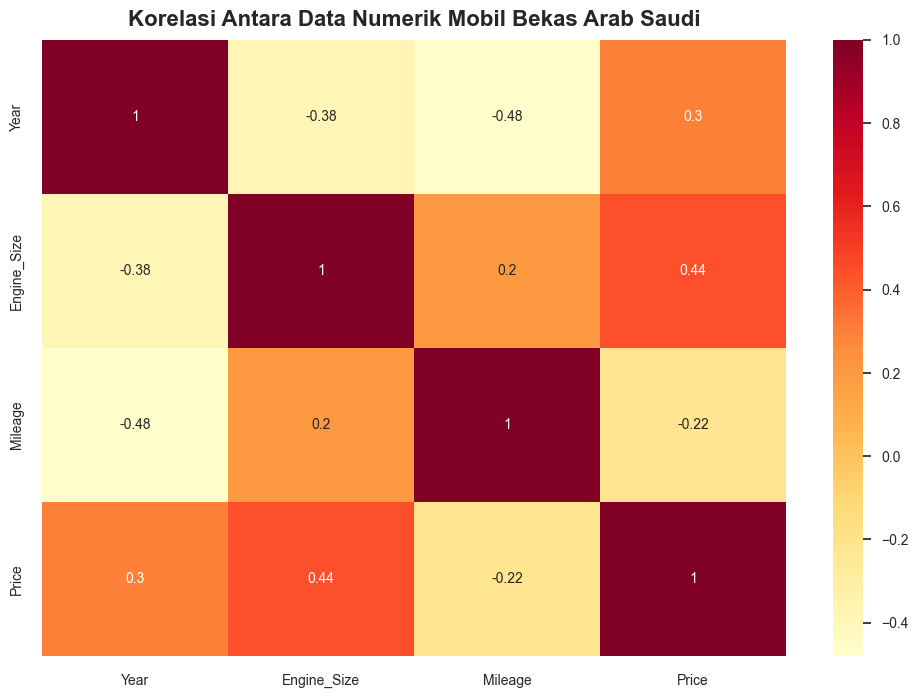

In [752]:
# Identifikasi kolom numerikal
numerical_columns = df_filled.select_dtypes(include=['int64', 'float64'])

df_filled_Corr = numerical_columns.corr(method = 'spearman')
plt.figure(figsize = (12,8))
sns.heatmap(df_filled_Corr, annot = True, cmap = 'YlOrRd')
plt.title('Korelasi Antara Data Numerik Mobil Bekas Arab Saudi', size=16, pad=10, fontweight='bold')
plt.show()

Berdasarkan **heatmap korelasi** antara variabel-variabel numerik pada dataset mobil bekas Arab Saudi, berikut adalah beberapa insight yang dapat diambil:

1. **Year vs Price**:

   >Terdapat **korelasi positif** yang moderat (**0.3**) antara `Year` dan `Price` mobil. Ini menunjukkan bahwa mobil yang lebih baru cenderung memiliki harga yang lebih tinggi.

2. **Engine Size vs Price**:

   >Ada **korelasi positif** yang moderat (**0.44**) antara `Engine Size` dan `Price`. Ini mengindikasikan bahwa mobil dengan ukuran mesin yang lebih besar cenderung memiliki harga yang lebih tinggi, sesuai dengan ekspektasi umum.

3. **Mileage vs Price**:

   >**Korelasi negatif** antara `Mileage` dan `Price` (**-0.22**) menunjukkan bahwa semakin tinggi jarak tempuh, semakin rendah harga mobil tersebut. Hal ini menunjukkan bahwa kendaraan dengan penggunaan lebih tinggi cenderung dihargai lebih rendah.

4. **Year vs Engine Size**:

   >Terdapat **korelasi negatif** yang lemah (**-0.38**) antara `Year` dan `Engine Size`. Ini menunjukkan bahwa mobil yang lebih baru cenderung memiliki ukuran mesin yang lebih kecil dibandingkan mobil yang lebih tua.

5. **Engine Size vs Mileage**:

   >Korelasi yang sangat lemah (**0.2**) antara `Engine Size` dan `Mileage` menunjukkan bahwa tidak ada hubungan yang jelas antara kedua variabel ini.

6. **Year vs Mileage**:

   >Ada **korelasi negatif** yang moderat (**-0.48**) antara `Year` dan `Mileage`. Ini mengindikasikan bahwa mobil yang lebih tua cenderung memiliki jarak tempuh yang lebih tinggi, sesuai dengan ekspektasi umum.


### Penanganan Kategori Langka pada Kolom Type

Pada kolom **`Type`**, dilakukan penghapusan terhadap kategori yang hanya muncul **sekali** (frekuensi = 1) dalam dataset. Tindakan ini dilakukan dengan mempertimbangkan beberapa aspek berikut:

1. **Kategori langka cenderung tidak representatif** terhadap distribusi populasi dan hanya muncul secara sporadis. Keberadaan kategori seperti ini tidak memberikan kontribusi yang signifikan terhadap proses analisis maupun pelatihan model prediktif.

2. **Model machine learning dapat mengalami overfitting terhadap kategori langka**, terutama jika menggunakan teknik encoding seperti one-hot atau target encoding. Hal ini dapat menyebabkan model belajar pola yang tidak general dan hanya berlaku pada data latih.

3. Kategori dengan frekuensi sangat rendah **tidak memiliki nilai statistik yang stabil**, sehingga bisa menimbulkan noise dan bias dalam perhitungan agregat, segmentasi, atau analisis berbasis kategori lainnya.

4. Dalam konteks bisnis dan interpretasi, kategori yang hanya muncul satu kali sering kali merupakan **anomali struktural**, hasil kesalahan input, atau kondisi khusus yang tidak layak digeneralisasi ke populasi data secara keseluruhan.

Dengan demikian, kategori dalam kolom `Type` yang hanya muncul **sekali** dihapus dari dataset untuk menjaga kualitas data, meningkatkan stabilitas statistik, serta memastikan hasil analisis dan pemodelan lebih relevan, robust, dan dapat diandalkan.


In [753]:
# Hitung frekuensi tiap Type
type_counts = df_filled['Type'].value_counts()

# Filter: ambil Type yang muncul lebih dari 1 kali
df_filled = df_filled[df_filled['Type'].isin(type_counts[type_counts > 1].index)]

### Feature Engineering: Kolom Car_Age

Dalam rangka meningkatkan relevansi informasi dan memperkuat kemampuan model dalam memahami karakteristik kendaraan, dilakukan proses feature engineering untuk membuat kolom baru bernama **`Car_Age`**, yaitu usia kendaraan yang dihitung berdasarkan selisih antara tahun saat ini dengan tahun produksi kendaraan (`Year`).

Alasan dan Manfaat:

1. **Usia kendaraan merupakan salah satu faktor paling penting dalam menentukan nilai pasar mobil bekas.**
   Mobil yang lebih tua umumnya memiliki harga jual lebih rendah dan tingkat keausan yang lebih tinggi. Dengan menghadirkan fitur usia secara eksplisit, model dapat lebih akurat mempelajari hubungan antara umur kendaraan dan nilai jualnya.

2. **Kolom `Car_Age` bersifat dinamis dan kontekstual terhadap waktu.**
   Berbeda dengan kolom `Year` yang absolut, `Car_Age` memberikan representasi relatif terhadap tahun saat analisis dilakukan. Ini membuat model tidak hanya mempelajari tahun tertentu, tetapi memahami konteks umur kendaraan.

3. **Fitur ini menjadikan model lebih tangguh untuk penggunaan di masa depan (future-proofing).**
   Karena `Car_Age` selalu dihitung berdasarkan tahun saat model dijalankan, model tetap relevan tanpa perlu dilatih ulang setiap tahun. Hal ini penting untuk menjaga keberlanjutan dan efisiensi dalam pengembangan model jangka panjang.

4. **Meningkatkan interpretabilitas model.**
   Stakeholder dan analis bisnis lebih mudah memahami makna dari `Car_Age` dibandingkan interpretasi langsung terhadap tahun produksi. Ini memudahkan proses komunikasi hasil analisis dan pengambilan keputusan berbasis data.

Dengan demikian, penambahan fitur `Car_Age` merupakan langkah strategis dalam preprocessing yang tidak hanya meningkatkan kualitas data, tetapi juga memastikan bahwa model tetap **akurat, relevan, dan berkelanjutan** di masa mendatang.


In [754]:
from datetime import datetime
tahun_sekarang = datetime.now().year

df_filled['Car_Age'] = tahun_sekarang - df_filled['Year']

In [755]:
# Pilih fitur numerik yang ingin dihitung VIF-nya
features = ['Year', 'Engine_Size', 'Mileage', 'Price', 'Car_Age']
X = df_filled[features]

# Standardisasi
X_scaled = StandardScaler().fit_transform(X)

# Hitung VIF
vif_data = pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
})

vif_data

,Feature,VIF
0,Year,inf
1,Engine_Size,1.75
2,Mileage,1.33
3,Price,1.68
4,Car_Age,inf


### Penghapusan Kolom Year Setelah Pembuatan Fitur Car_Age

Setelah dilakukan feature engineering dengan menambahkan kolom `Car_Age`, yaitu usia kendaraan yang dihitung berdasarkan tahun saat ini dikurangi tahun produksi (`Year`), maka kolom `Year` dihapus dari dataset. Keputusan ini didasarkan pada pertimbangan teknis dan konseptual berikut:

---

1. **Redundansi Informasi (Perfect Multicollinearity)**

Kolom `Year` dan `Car_Age` memiliki hubungan matematis yang bersifat langsung dan pasti:

> `Car_Age = Tahun_Sekarang - Year`

Kehadiran keduanya dalam satu model menyebabkan **multikolinearitas sempurna**, yang terbukti dari nilai **VIF (Variance Inflation Factor) yang tak hingga (infinite)** pada kedua kolom. Hal ini dapat mengganggu model linear dan menyebabkan interpretasi koefisien menjadi tidak stabil. Oleh karena itu, salah satu dari dua kolom ini perlu dihapus untuk menjaga stabilitas model.

---

2. **Relevansi dan Generalisasi Model (Future-Proofing)**

Kolom `Car_Age` bersifat **dinamis** karena nilainya akan selalu berubah mengikuti tahun saat model dijalankan. Ini memberikan konteks yang lebih aktual dan memungkinkan model digunakan dalam jangka panjang tanpa perlu pembaruan fitur manual setiap tahun.

Sebaliknya, kolom `Year` bersifat **statis** dan hanya merepresentasikan waktu produksi absolut, yang secara bertahap akan kehilangan makna dalam konteks prediktif seiring berjalannya waktu.

---

3. **Interpretabilitas yang Lebih Baik**

Bagi pengguna akhir dan pemangku kepentingan non-teknis, fitur `Car_Age` lebih mudah dipahami dan diinterpretasikan dibandingkan `Year`. Usia kendaraan secara langsung berkaitan dengan persepsi nilai pasar, depresiasi, dan kondisi kendaraan, sehingga lebih intuitif dalam analisis dan komunikasi hasil model.

Kesimpulan

Penghapusan kolom `Year` setelah pembuatan `Car_Age` merupakan langkah yang tepat untuk menghindari redundansi informasi, meningkatkan generalisasi model di masa depan, dan menyederhanakan interpretasi hasil analisis.


In [756]:
df_filled = df_filled.drop(columns=['Year'])

## **Data Pre-Processing**

### 1. Define X dan y

In [758]:
# define y
y = df_filled['Price']

# define X
X = df_filled.drop(columns = 'Price')

### 2. Train Test Splitting

In [759]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

### 3. Encoding dan Scaling

**1. Encoding**

> Encoding diperlukan untuk mengonversi fitur kategorikal menjadi format numerik yang dapat diproses oleh algoritma machine learning. Pemilihan metode encoding disesuaikan dengan jumlah kategori dan sifat data yang ada, dengan tujuan untuk meningkatkan efisiensi dan akurasi model.

#### 1.1 **Binary Encoding**

**Fitur:** `Type`, `Region`, `Make`, `Color`

* Fitur-fitur ini memiliki **jumlah kategori yang relatif banyak**, terutama pada fitur `Make` (merek mobil) dan `Region` (wilayah).

**Alasan Pemilihan:**

* Mengurangi dimensi fitur dibandingkan dengan metode One-Hot Encoding, sehingga dapat mengurangi kompleksitas data.
* Efisien secara komputasi, mengingat ukuran data yang lebih kecil setelah encoding.
* Membantu menghindari multikolinearitas, karena tidak menciptakan banyak kolom seperti dalam One-Hot Encoding.
* Cocok untuk model berbasis pohon keputusan, seperti XGBoost, yang lebih baik menangani variabel kategorikal dengan banyak kategori.

#### 1.2 **One-Hot Encoding**

**Fitur:** `Gear_Type`, `Origin`, `Options`, `Fuel_Type`

* Fitur-fitur ini memiliki **jumlah kategori yang terbatas** (2–5 kelas).

**Alasan Pemilihan:**

* Menghindari pemaksaan urutan numerik yang tidak ada (non-ordinal) dalam fitur kategorikal.
* Dimensi fitur tetap kecil karena jumlah kategori yang terbatas, sehingga tidak menciptakan masalah dalam hal overfitting.
* Memastikan bahwa model tidak memberi bobot yang tidak sesuai pada kategori tertentu dengan cara memberi representasi numerik yang independen.

**2. Scaling**

> Scaling diperlukan untuk menstandardisasi skala fitur numerik sehingga model tidak memprioritaskan satu fitur hanya karena nilainya lebih besar secara absolut. Proses ini juga memastikan bahwa fitur dengan skala yang lebih besar tidak mendominasi dalam algoritma yang sensitif terhadap skala data, seperti regresi linier dan model berbasis gradient boosting.

#### 2.1 **Robust Scaling**

**Fitur:** `Car_Age`, `Engine_Size`, `Mileage`

**Alasan Pemilihan:**

* RobustScaler menggunakan median dan interquartile range (IQR) sebagai dasar untuk scaling, yang membuatnya lebih tahan terhadap pengaruh outlier.
* Memastikan bahwa fitur dengan distribusi yang tidak simetris atau memiliki outlier tidak mengganggu pelatihan model.
* Memberikan distribusi data yang lebih stabil dan meningkatkan kinerja model, terutama pada data yang memiliki nilai ekstrem.


In [760]:
# pipeline transformasi
transformer = ColumnTransformer([
    ('Binary', BinaryEncoder(), ['Type', 'Region', 'Make', 'Color']),
    ('onehot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options', 'Fuel_Type']), 
    ('robust', RobustScaler(), ['Car_Age', 'Engine_Size', 'Mileage'])
], remainder = 'passthrough')

## **Modeling**

### **Benchmark Modeling**

**1. Linear Regression (lin_reg)**
> Model regresi linier adalah model statistik dasar yang digunakan untuk memprediksi nilai target (Y) berdasarkan hubungan linier antara fitur (X) dan target. Model ini mengasumsikan bahwa perubahan pada fitur $X$ akan menyebabkan perubahan proporsional pada nilai target $Y$. Regresi linier cocok digunakan ketika hubungan antar variabel dapat dijelaskan dengan persamaan linear.

**2. Ridge Regression (ridge)**
> Ridge Regression adalah varian dari regresi linier yang menerapkan regularisasi L2. Dengan menambahkan penalti terhadap besarnya koefisien model, Ridge membantu mencegah **overfitting**, terutama pada dataset dengan multikolinearitas, yaitu ketika fitur-fitur memiliki korelasi tinggi. Regularisasi L2 membuat model lebih stabil dengan mengurangi varians model tanpa menghilangkan fitur.

**3. Lasso Regression (lasso)**
> Lasso Regression menggunakan regularisasi L1 yang dapat memaksa beberapa koefisien fitur menjadi nol. Hal ini tidak hanya mencegah overfitting tetapi juga memungkinkan **seleksi fitur otomatis** dengan mengurangi dimensi data, menjaga hanya fitur-fitur yang paling relevan. Lasso sangat berguna untuk dataset dengan banyak fitur yang tidak relevan.

**4. ElasticNet Regression (elastic_net)**
> ElasticNet adalah kombinasi antara regularisasi L1 (Lasso) dan L2 (Ridge). Model ini digunakan ketika terdapat banyak fitur berkorelasi dan ketika Lasso atau Ridge saja tidak cukup. ElasticNet memberikan fleksibilitas dalam menangani berbagai jenis dataset dengan menggabungkan manfaat dari kedua teknik regularisasi, menjaga keseimbangan antara seleksi fitur dan penurunan overfitting.

**5. K-Nearest Neighbors Regression (knn)**
> K-Nearest Neighbors (KNN) Regression memprediksi nilai target dengan menghitung rata-rata nilai dari **k** tetangga terdekat dalam ruang fitur. Model ini bersifat **non-parametrik**, artinya tidak mengasumsikan hubungan tertentu antara variabel. KNN sangat berguna pada dataset dengan hubungan kompleks antar fitur, namun dapat menjadi lambat untuk dataset besar.

**6. Decision Tree Regression (dt_reg)**
> Decision Tree Regression membangun model berdasarkan serangkaian pertanyaan berstruktur (seperti pohon keputusan). Data dibagi secara rekursif menjadi subset yang lebih homogen berdasarkan nilai fitur tertentu. Model ini mudah dipahami dan diinterpretasikan, tetapi rentan terhadap **overfitting** jika tidak dikontrol dengan parameter yang tepat.

**7. Random Forest Regression (random_forest)**
> Random Forest adalah metode **ensemble** yang terdiri dari banyak pohon keputusan (decision trees). Setiap pohon menghasilkan prediksi, dan hasil akhir diperoleh dengan menggabungkan prediksi-prediksi tersebut. Random Forest lebih akurat dan stabil dibandingkan pohon keputusan tunggal, dan dapat menangani **overfitting** lebih baik.

**8. Gradient Boosting Regression (gradboost)**
> Gradient Boosting adalah metode ensemble yang membangun model secara bertahap. Tiap pohon keputusan baru dibangun untuk memperbaiki kesalahan yang dibuat oleh pohon sebelumnya. Teknik ini efektif untuk menangani data yang lebih kompleks, namun bisa lebih rentan terhadap **overfitting** jika tidak diatur dengan benar.

**9. XGBoost (xgboost)**
> Extreme Gradient Boosting (XGBoost) adalah versi yang lebih efisien dan cepat dari **Gradient Boosting**. XGBoost menawarkan fitur-fitur tambahan seperti **regularisasi** untuk menghindari overfitting, kontrol terhadap distribusi error, dan **paralelisasi** untuk meningkatkan kecepatan pemrosesan. XGBoost telah menjadi pilihan populer dalam kompetisi data science berkat performa dan efisiensinya.

**10. Support Vector Regression (SVR)**
> Support Vector Regression (SVR) adalah teknik regresi yang menggunakan prinsip-prinsip **Support Vector Machines (SVM)**. SVR memetakan data ke dalam ruang dimensi tinggi dan mencoba menemukan hyperplane yang memaksimalkan margin antara data titik dan prediksi. SVR sangat efektif untuk data dengan hubungan non-linear, tetapi memerlukan waktu komputasi yang lebih besar untuk dataset besar.



#### **Define Model**

In [761]:
# define model benchmark
lin_reg = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
elasticNet = ElasticNet(alpha=1.0, l1_ratio=0.5)
knn = KNeighborsRegressor(n_neighbors = 5)
dt_reg = DecisionTreeRegressor(random_state = 42)
xgboost = XGBRegressor(
        random_state=42,
        verbosity=0)
gradboost = GradientBoostingRegressor(random_state = 42)
random_forest = RandomForestRegressor(random_state=42)
adaboost = AdaBoostRegressor()
catboost = CatBoostRegressor(random_state = 42, verbose = False)
svr = SVR(kernel = 'rbf')


#### **Cross Validation**

In [762]:
# list model
model = [lin_reg, ridge, lasso, elasticNet, knn, dt_reg, xgboost, gradboost, random_forest, adaboost, catboost, svr]

# metrics
list_scorer = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

# list kosong
list_mean_mae = []
list_std_mae = []

list_mean_mape = []
list_std_mape = []

list_all = []

# looping model dengan pipeline dan cross validation
for i in model:
    # pipeline
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
        ])
    
    crossval = cross_validate(pipe_prep_model, 
                              X_train,
                              y_train,
                              cv = KFold(n_splits=5, shuffle=True, random_state=42),
                              scoring = list_scorer
                              )
    
    list_all.append(crossval)
    list_mean_mae.append(crossval['test_neg_mean_absolute_error'].mean())
    list_std_mae.append(crossval['test_neg_mean_absolute_error'].std())
    list_mean_mape.append(crossval['test_neg_mean_absolute_percentage_error'].mean())
    list_std_mape.append(crossval['test_neg_mean_absolute_percentage_error'].std())

In [763]:
df_model_cv = pd.DataFrame()
df_model_cv['model'] = model
df_model_cv['mean_mae'] = list_mean_mae
df_model_cv['std_mae'] = list_std_mae
df_model_cv['mean_mape'] = list_mean_mape
df_model_cv['std mape'] = list_std_mape
df_model_cv.sort_values('mean_mape', ascending = False)

,model,mean_mae,std_mae,mean_mape,std mape
10,<catboost.core.CatBoostRegressor object at 0x0...,"-9,902.75",404.74,-0.17,0.01
6,"XGBRegressor(base_score=None, booster=None, ca...","-11,469.45",291.58,-0.20,0.01
8,RandomForestRegressor(random_state=42),"-12,104.15",489.12,-0.21,0.01
7,GradientBoostingRegressor(random_state=42),"-14,238.53",468.92,-0.24,0.01
4,KNeighborsRegressor(),"-14,709.51",420.60,-0.26,0.01
5,DecisionTreeRegressor(random_state=42),"-16,840.41","1,150.30",-0.28,0.03
2,Lasso(random_state=42),"-19,366.91",561.64,-0.34,0.01
1,Ridge(random_state=42),"-19,369.78",562.93,-0.34,0.01
0,LinearRegression(),"-19,368.37",559.66,-0.34,0.01
3,ElasticNet(),"-23,530.45",596.51,-0.44,0.01


### Model Terbaik

#### **CatBoost (Categorical Boosting)**

**CatBoost** adalah singkatan dari **Categorical Boosting**, sebuah algoritma machine learning berbasis pohon keputusan (decision tree) yang dirancang untuk menangani fitur kategorikal secara efisien. CatBoost dikembangkan oleh Yandex dan telah menjadi salah satu pilihan utama dalam kompetisi data science karena kemampuannya untuk menangani data kategorikal tanpa perlu melakukan encoding secara manual. CatBoost juga dikenal karena kemampuannya dalam menghasilkan model yang **akurat, cepat, dan stabil**.

* **Cara Kerja CatBoost**

  1. **Gradient Boosting Framework**
     CatBoost adalah implementasi dari **gradient boosting**, yang membangun model secara bertahap dengan menambahkan **weak learners** (biasanya pohon keputusan kecil) satu per satu untuk memperbaiki kesalahan dari model sebelumnya.

  2. **Additive Model**
     Model akhir merupakan penjumlahan dari serangkaian pohon keputusan:

     $$
     \hat{y}_i = \sum_{k=1}^{K} f_k(x_i), \quad f_k \in \mathcal{F}
     $$

     Di mana $\mathcal{F}$ adalah ruang semua pohon keputusan, dan $f_k$ adalah pohon ke-k.

  3. **Fungsi Objektif (Objective Function)**
     Fungsi objektif CatBoost terdiri dari:

     * **Loss Function (L):** Mengukur seberapa baik prediksi terhadap label aktual (misalnya MSE untuk regresi).
     * **Regularization (Ω):** Mengontrol kompleksitas model agar tidak overfitting.

     $$
     \text{Obj} = \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
     $$

  4. **Penanganan Fitur Kategorikal**
     Salah satu keunggulan utama CatBoost adalah kemampuannya untuk menangani **fitur kategorikal** secara langsung tanpa perlu melakukan encoding seperti One-Hot atau Label Encoding. CatBoost menggunakan teknik **ordered boosting** yang memungkinkan penggunaan fitur kategorikal secara langsung, sehingga mengurangi kemungkinan bias dan overfitting yang sering terjadi pada teknik encoding tradisional.

* **Kelebihan dan Kekurangan**

  **Kelebihan:**

  * Efisien dalam menangani fitur kategorikal tanpa memerlukan preprocessing yang rumit.
  * Akurat dan cepat, dengan performa yang sangat baik pada data tabular.
  * Regularisasi yang baik, menghindari overfitting dengan parameter yang dapat disesuaikan.
  * Multilingual, mendukung berbagai bahasa seperti Python, R, C++, dan Java.
  * Mudah digunakan dengan fitur-fitur seperti **Hyperparameter tuning** otomatis.

  **Kekurangan:**

  * Tidak sebaik deep learning untuk data gambar atau teks.
  * Memerlukan tuning parameter yang lebih mendalam dibandingkan dengan model yang lebih sederhana.
  * Waktu pelatihan bisa lebih lama pada dataset yang sangat besar, meskipun lebih cepat daripada beberapa algoritma boosting lainnya.

* **Referensi**

  * [CatBoost Documentation](https://catboost.ai/docs/)




### Evaluasi Model: MAE dan MAPE

1. **MAE (Mean Absolute Error)**

Pengertian : MAE adalah rata-rata dari nilai absolut selisih antara nilai aktual dan nilai prediksi.

Rumus:

`MAE = (1/n) * Σ|yᵢ - ŷᵢ|`

Keterangan:
- Memberikan gambaran seberapa jauh prediksi dari nilai sebenarnya.
- Tidak terlalu dipengaruhi oleh outlier.

---

2. **MAPE (Mean Absolute Percentage Error)**

Pengertian : MAPE adalah rata-rata dari persentase kesalahan absolut terhadap nilai aktual.

Rumus:

`MAPE = (100/n) * Σ(|yᵢ - ŷᵢ| / |yᵢ|)`

Keterangan:
- Mengukur kesalahan dalam bentuk persentase.
- Tidak cocok jika ada nilai aktual = 0 (karena pembagian dengan nol).

#### **Hyperparameter Tuning**

In [764]:
# Pipeline gabungan preprocessing dan model
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),  # transformer dari sebelumnya
    ('model', catboost)
])

# Parameter tuning: gunakan prefix 'model__'
hyperparam = {
    'model__depth': [6],  # nilai tengah yang umum
    'model__learning_rate': [0.03],  # cukup 1 saja
    'model__iterations': [500],  # iterasi sedang
    'model__l2_leaf_reg': [3, 5],  # cukup 2 opsi
    'model__bagging_temperature': [0.5],  # satu nilai
    'model__random_strength': [1],  # satu nilai
    'model__grow_policy': ['SymmetricTree'],  # yang default
    'model__boosting_type': ['Ordered'],  # biasanya lebih stabil
    'model__border_count': [64],  # resolusi histogram, 64 cukup
    'model__verbose': [100]  # progress info
}

# GridSearchCV
grid_model = GridSearchCV(
    estimator=pipe_prep_model,
    param_grid=hyperparam,
    cv=3,
    scoring='neg_mean_absolute_percentage_error',  # bisa juga ganti ke 'neg_root_mean_squared_error'
    verbose=1,
    n_jobs=-1
)

In [765]:
grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
0:	learn: 38265.2262370	total: 7.92ms	remaining: 3.95s
100:	learn: 19376.7950706	total: 931ms	remaining: 3.68s
200:	learn: 15983.2126494	total: 1.86s	remaining: 2.77s
300:	learn: 14478.1776933	total: 2.81s	remaining: 1.86s
400:	learn: 13796.8015569	total: 3.72s	remaining: 918ms
499:	learn: 13132.7879349	total: 4.7s	remaining: 0us


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Binary',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
                                                                          'Make',
                                                                          'Color']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options',
                                                                          'Fuel_Type']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['Car_Age',
                                                                          'Engine_Size',
                                                                          'Mileage'])])),
                                       ('model',
                                        <catboost.core....
             param_grid={'model__bagging_temperature': [0.5],
                         'model__boosting_type': ['Ordered'],
                         'model__border_count': [64], 'model__depth': [6],
                         'model__grow_policy': ['SymmetricTree'],
                         'model__iterations': [500],
                         'model__l2_leaf_reg': [3, 5],
                         'model__learning_rate': [0.03],
                         'model__random_strength': [1],
                         'model__verbose': [100]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [766]:
grid_model.best_score_

np.float64(-0.1927668335048375)

In [767]:
grid_model.best_params_

{'model__bagging_temperature': 0.5,
 'model__boosting_type': 'Ordered',
 'model__border_count': 64,
 'model__depth': 6,
 'model__grow_policy': 'SymmetricTree',
 'model__iterations': 500,
 'model__l2_leaf_reg': 3,
 'model__learning_rate': 0.03,
 'model__random_strength': 1,
 'model__verbose': 100}

## **Evaluasi Model**

### Perbandingan Model Sebelum Hyperparameter Tuning vs Setelah Hyperparameter

### Prediksi untuk Menguji Set Sebelum Tuning

In [768]:
# pipeline
pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('model', catboost)
    ])

# fit
pipe_prep_model.fit(X_train, y_train)

# predict
y_pred_test_before = pipe_prep_model.predict(X_test)
y_pred_train_before = pipe_prep_model.predict(X_train)

# scoring
mae_test_before = mean_absolute_error(y_test, y_pred_test_before)
mae_train_before = mean_absolute_error(y_train, y_pred_train_before)

mape_test_before = mean_absolute_percentage_error(y_test, y_pred_test_before)
mape_train_before = mean_absolute_percentage_error(y_train, y_pred_train_before)

In [769]:
df_score = pd.DataFrame()
df_score['Model'] = ['XGBoost before tunning']
df_score["MAE Test"] = [mae_test_before]
df_score["MAE Train"] = [mae_train_before]
df_score["MAPE Test"] = [mape_test_before]
df_score["MAPE Train"] = [mape_train_before]
df_score

,Model,MAE Test,MAE Train,MAPE Test,MAPE Train
0,XGBoost before tunning,"9,351.90","5,571.81",0.16,0.09


### Prediksi untuk Menguji Set Setelah Tuning

In [770]:
# model setelah hyperparameter tuning
best_model = grid_model.best_estimator_

# fit
best_model.fit(X_train, y_train)

# predict
y_pred_test_after = best_model.predict(X_test)
y_pred_train_after = best_model.predict(X_train)

# scoring
mae_test_after = mean_absolute_error(y_test, y_pred_test_after)
mae_train_after = mean_absolute_error(y_train, y_pred_train_after)

mape_test_after = mean_absolute_percentage_error(y_test, y_pred_test_after)
mape_train_after = mean_absolute_percentage_error(y_train, y_pred_train_after)

0:	learn: 38265.2262370	total: 10.3ms	remaining: 5.15s
100:	learn: 19376.7950706	total: 947ms	remaining: 3.74s
200:	learn: 15983.2126494	total: 1.85s	remaining: 2.75s
300:	learn: 14478.1776933	total: 2.73s	remaining: 1.8s
400:	learn: 13796.8015569	total: 3.64s	remaining: 899ms
499:	learn: 13132.7879349	total: 4.58s	remaining: 0us


In [771]:
df_score_tuning = pd.DataFrame()
df_score_tuning['Model'] = ['XGBoost after tunning']
df_score_tuning["MAE Test"] = [mae_test_after]
df_score_tuning["MAE Train"] = [mae_train_after]
df_score_tuning["MAPE Test"] = [mape_test_after]
df_score_tuning["MAPE Train"] = [mape_train_after]
df_score_tuning

,Model,MAE Test,MAE Train,MAPE Test,MAPE Train
0,XGBoost after tunning,"10,455.38","9,231.58",0.17,0.15


### Evaluasi Model

In [772]:
df_compare = pd.concat([df_score_tuning,df_score],axis=0)
df_compare

,Model,MAE Test,MAE Train,MAPE Test,MAPE Train
0,XGBoost after tunning,"10,455.38","9,231.58",0.17,0.15
0,XGBoost before tunning,"9,351.90","5,571.81",0.16,0.09


Insight:

1. **Perbandingan Model**:

   * **MAE Test**: Model setelah tuning memiliki MAE lebih rendah pada data uji, menunjukkan peningkatan kinerja pada data baru.
   * **MAE Train**: MAE pada data pelatihan lebih tinggi setelah tuning, mengindikasikan sedikit overfitting.

2. **MAPE**:

   * **MAPE Test**: Model setelah tuning memiliki MAPE lebih rendah, mendukung peningkatan kinerja pada data uji.
   * **MAPE Train**: MAPE pada data pelatihan lebih tinggi setelah tuning, menunjukkan trade-off antara pelatihan dan generalisasi.

Kesimpulan:

* Tuning meningkatkan kemampuan model dalam generalisasi ke data baru.
* Tuning mungkin menyebabkan sedikit penurunan kinerja pada data pelatihan, tetapi lebih baik pada data uji.


## Ordered Boosting

Untuk mengatasi masalah overfitting yang masih terjadi setelah penerapan hyperparameter tuning, kami memutuskan untuk mengimplementasikan teknik **"ordered boosting"** yang ditawarkan oleh **CatBoost**. CatBoost memiliki keunggulan dalam menangani fitur kategori secara langsung tanpa memerlukan binning atau encoding manual. Teknik **ordered boosting** memungkinkan model untuk memproses fitur kategori secara native, yang secara signifikan mengurangi kompleksitas pemrosesan serta menghindari potensi bias yang sering muncul dari metode encoding konvensional. Dengan memanfaatkan fitur kategori secara langsung, CatBoost dapat menjaga integritas informasi kategori, meningkatkan efisiensi model dalam menangani data dengan banyak variabel kategori, dan memaksimalkan penggunaan informasi yang ada. Pendekatan ini tidak hanya efektif dalam mengurangi overfitting, tetapi juga meningkatkan kemampuan model untuk menggeneralisasi pada data yang belum terlihat, sehingga berkontribusi pada peningkatan kinerja model dalam tugas prediksi secara keseluruhan.

### Model Terbaik dengan Teknik Ordered Boosting

In [773]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# 1. Split seperti biasa
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 2. Nama kolom kategorikal
cat_cols = ['Type', 'Region', 'Make', 'Color',
            'Gear_Type', 'Origin', 'Options', 'Fuel_Type']

# 3. Model
cat_model = CatBoostRegressor(
    loss_function='MAE',
    cat_features=cat_cols,
    verbose=0
)

hyperparam = {
    'depth': [6],
    'learning_rate': [0.03],
    'iterations': [500],
    'l2_leaf_reg': [3],
    'bagging_temperature': [0.5],
    'random_strength': [1],
    'grow_policy': ['SymmetricTree'],
    'boosting_type': ['Ordered'],
    'border_count': [64],
    'verbose': [100]
}

# 5. GridSearch langsung pada model
grid = GridSearchCV(
    estimator=cat_model,
    param_grid=hyperparam,
    cv=3,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    verbose=1
)

# 6. Fit – kirim nama kolom karena DataFrame masih utuh
grid.fit(X_train, y_train,
         cat_features=cat_cols)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 29273.2820780	total: 41.4ms	remaining: 20.7s
100:	learn: 14232.8401561	total: 4.18s	remaining: 16.5s
200:	learn: 12159.8495080	total: 7.95s	remaining: 11.8s
300:	learn: 11187.2868932	total: 11.7s	remaining: 7.76s
400:	learn: 10384.2721348	total: 16.2s	remaining: 4s
499:	learn: 9892.0162151	total: 21s	remaining: 0us


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000025482A4C7A0>,
             n_jobs=-1,
             param_grid={'bagging_temperature': [0.5],
                         'boosting_type': ['Ordered'], 'border_count': [64],
                         'depth': [6], 'grow_policy': ['SymmetricTree'],
                         'iterations': [500], 'l2_leaf_reg': [3],
                         'learning_rate': [0.03], 'random_strength': [1],
                         'verbose': [100]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [774]:
# Prediksi data train dan test
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

# Hitung MAPE
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

# Tampilkan hasil
print(f"MAPE Train: {mape_train * 100:.2f}%")
print(f"MAPE Test : {mape_test*100:.2f}%")

MAPE Train: 13.95%
MAPE Test : 15.82%


Insight: 

1. **MAPE pada Data Pelatihan**: Model memiliki MAPE sebesar **13.95%** pada data pelatihan. Ini menunjukkan bahwa model menghasilkan kesalahan rata-rata sekitar 13.95% pada data yang digunakan untuk melatihnya.

2. **MAPE pada Data Uji**: MAPE pada data uji adalah **15.82%**, yang sedikit lebih tinggi dibandingkan dengan data pelatihan. Hal ini menunjukkan bahwa meskipun model bekerja cukup baik pada data pelatihan, ada sedikit penurunan kinerjanya saat diterapkan pada data yang tidak terlihat sebelumnya.

Kesimpulan: 

* Selisih yang relatif kecil antara MAPE pada data pelatihan dan data uji menunjukkan bahwa model memiliki kemampuan generalisasi yang cukup baik, meskipun ada sedikit perbedaan dalam kinerja antara keduanya.
* MAPE pada kedua set data berada dalam kisaran yang dapat diterima, yang menunjukkan bahwa model cukup stabil dan tidak mengalami overfitting yang signifikan. Namun, sedikit peningkatan MAPE pada data uji bisa menunjukkan ruang untuk perbaikan dalam generalisasi model.


## Simpan Model Final

In [775]:
# Simpan
joblib_file = "Model_Catboost.joblib"
joblib.dump(grid.best_estimator_, joblib_file)

print(f"Model saved to {joblib_file}")

Model saved to Model_Catboost.joblib


## Feature Importance

In [776]:
best_model = joblib.load("Model_Catboost.joblib")

In [777]:
best_model.feature_importances_

array([14.58440534, 22.25992689,  0.56664084,  0.54279942,  4.43520385,
       17.79505012,  3.2826282 ,  0.22408073,  7.51766627,  0.62779763,
       28.16380071])

In [778]:
# Mendapatkan feature importances dari model terbaik
feature_imp = pd.DataFrame(best_model.feature_importances_, columns=['Importance'])

# Menambahkan nama fitur jika diperlukan, pastikan 'best_model' memiliki atribut fitur
feature_imp['Feature'] = X_train.columns  # X_train adalah DataFrame fitur yang digunakan untuk pelatihan

# Menyortir fitur berdasarkan nilai importance dan memilih 5 fitur teratas
Top5_feature = feature_imp.sort_values('Importance', ascending=False).head(5)

# Menampilkan 5 fitur teratas
Top5_feature

,Importance,Feature
10,28.16,Car_Age
1,22.26,Type
5,17.80,Engine_Size
0,14.58,Make
8,7.52,Mileage


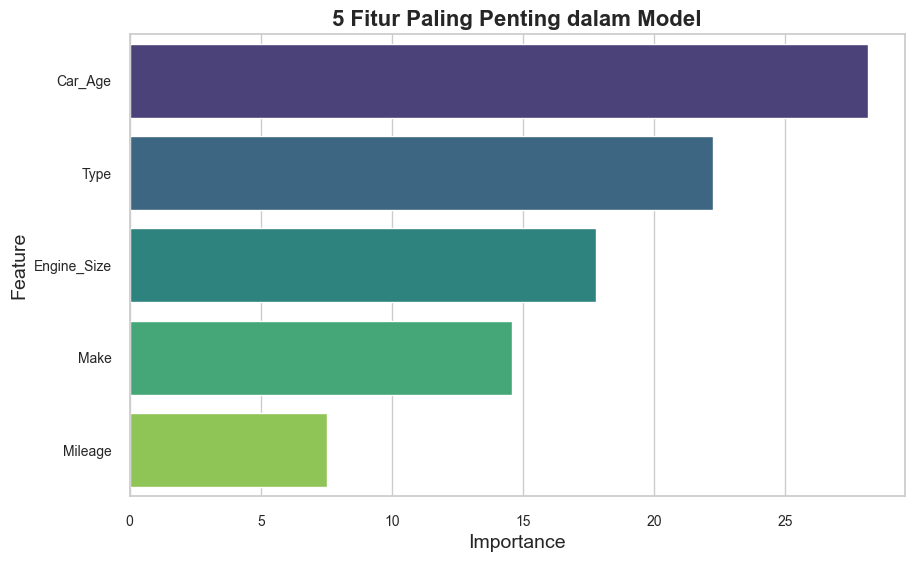

In [779]:
# Membuat barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=Top5_feature, palette='viridis')

# Menambahkan judul dan label
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Tambahkan judul grafik
plt.title('5 Fitur Paling Penting dalam Model', fontsize=16, fontweight='bold')

# Menampilkan plot
plt.show()

### Insight

Berdasarkan analisis feature importance dari model prediksi harga mobil bekas di Arab Saudi, berikut adalah lima fitur paling penting yang berkontribusi terhadap prediksi harga:

1. **Usia Kendaraan (`Car_Age`)**

   * Fitur `Car_Age` merupakan fitur paling penting dalam model, yang mencerminkan bahwa semakin tua usia kendaraan, semakin rendah nilai jualnya. Hal ini sejalan dengan persepsi umum bahwa kendaraan yang lebih lama cenderung memiliki penurunan kualitas, performa, dan daya tarik bagi pembeli.

2. **Tipe Kendaraan (`Type`)**

   * Tipe kendaraan juga menjadi faktor utama yang memengaruhi harga. Kendaraan bertipe SUV, sedan, atau model premium lainnya sering kali memiliki perbedaan harga signifikan. Preferensi konsumen terhadap tipe kendaraan tertentu dapat mendorong harga naik.

   
3. **Kapasitas Mesin (`Engine_Size`)**

   * Ukuran mesin memengaruhi performa kendaraan dan efisiensi bahan bakar. Mesin dengan kapasitas lebih besar umumnya dianggap memiliki performa lebih baik, sehingga bisa meningkatkan nilai jual kendaraan bekas.

4. **Merek Kendaraan (`Make`)**

   * Merek kendaraan memiliki pengaruh penting terhadap harga jual. Beberapa merek memiliki reputasi yang kuat dalam hal kualitas, ketahanan, dan nilai jual kembali, sehingga cenderung dihargai lebih tinggi di pasar mobil bekas.

5. **Jarak Tempuh (`Mileage`)**

   * Meskipun berada di posisi kelima, `Mileage` tetap berpengaruh dalam menentukan harga mobil bekas. Jarak tempuh yang rendah biasanya diasosiasikan dengan kondisi kendaraan yang lebih baik, namun pengaruhnya tidak sebesar usia, tipe, atau merek kendaraan.

### Kesimpulan

- **Dominasi Fitur Usia**: `Car_Age` menjadi indikator paling penting, menandakan bahwa usia kendaraan adalah faktor utama dalam menentukan harga jual kembali.
- **Karakteristik Kendaraan Berperan Besar**: Tipe kendaraan, kapasitas mesin, dan merek semuanya berkontribusi besar terhadap variasi harga di pasar mobil bekas.
- **Mileage Relevan namun Sekunder**: Jarak tempuh tetap relevan, namun memiliki pengaruh lebih kecil dibandingkan dengan faktor-faktor utama lainnya.

## Residual vs Predicted Value Plot

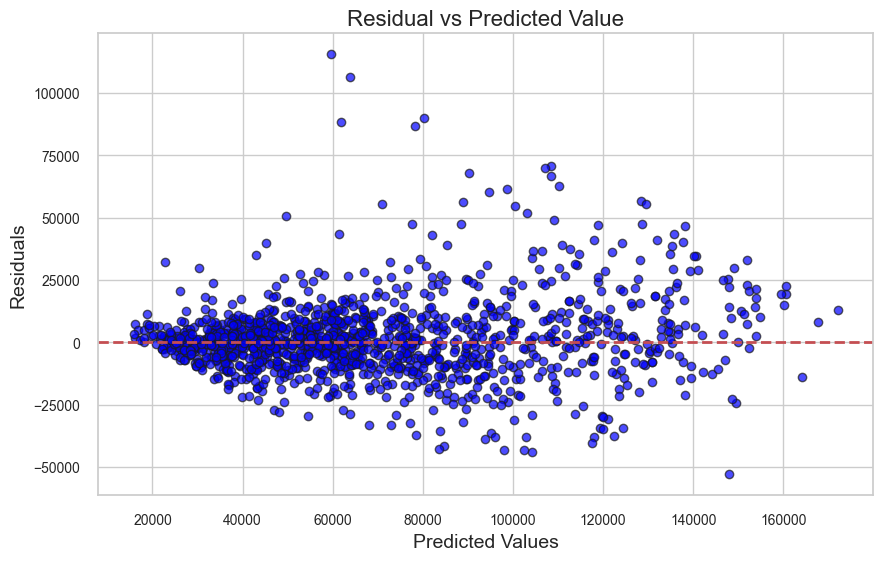

In [780]:
# Melakukan prediksi pada data uji
y_pred = best_model.predict(X_test)

# Menghitung residuals
residuals = y_test - y_pred

# Membuat residual plot menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolors='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Garis nol untuk referensi
plt.title('Residual vs Predicted Value', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

Berdasarkan **residual plot** yang ditampilkan, berikut adalah beberapa insight yang dapat ditarik:

1. **Distribusi Residual yang Baik**:

   * Sebagian besar residual terdistribusi di sekitar garis nol pada sumbu Y, yang menunjukkan bahwa model **CatBoost** memberikan prediksi yang cukup akurat tanpa adanya bias besar pada prediksi yang lebih tinggi atau lebih rendah. Ini menunjukkan bahwa kesalahan model relatif seimbang.

2. **Potensi Heteroskedastisitas**:

   * Meskipun mayoritas residual terpusat di sekitar 0, ada beberapa titik di sisi kiri dan kanan yang lebih jauh dari garis nol. Hal ini bisa menunjukkan adanya heteroskedastisitas, yaitu peningkatan variabilitas residual pada nilai prediksi yang lebih tinggi atau lebih rendah. Ini bisa menjadi indikasi bahwa model kurang efektif pada prediksi dengan nilai ekstrem.

3. **Tidak Ada Pola Sistematis**:

   * Tidak ada pola yang jelas seperti tren naik atau turun dalam residual plot, yang menunjukkan bahwa model tidak mengalami masalah besar seperti bias sistematis dalam memprediksi data. Ini adalah tanda positif karena menunjukkan bahwa model sudah berhasil menangani data dengan baik tanpa overfitting atau underfitting yang jelas.

Kesimpulan:

* Secara keseluruhan, **CatBoost** menunjukkan performa yang baik dengan sebagian besar prediksi yang akurat, tanpa adanya bias besar. Namun, ada sedikit indikasi heteroskedastisitas, terutama pada nilai ekstrim, yang bisa menjadi area untuk perbaikan lebih lanjut dalam model. Residual plot ini menunjukkan bahwa model tidak menunjukkan pola sistematis yang mengindikasikan kesalahan model yang serius, sehingga kinerjanya dapat dianggap stabil.

## Actual vs Prediction

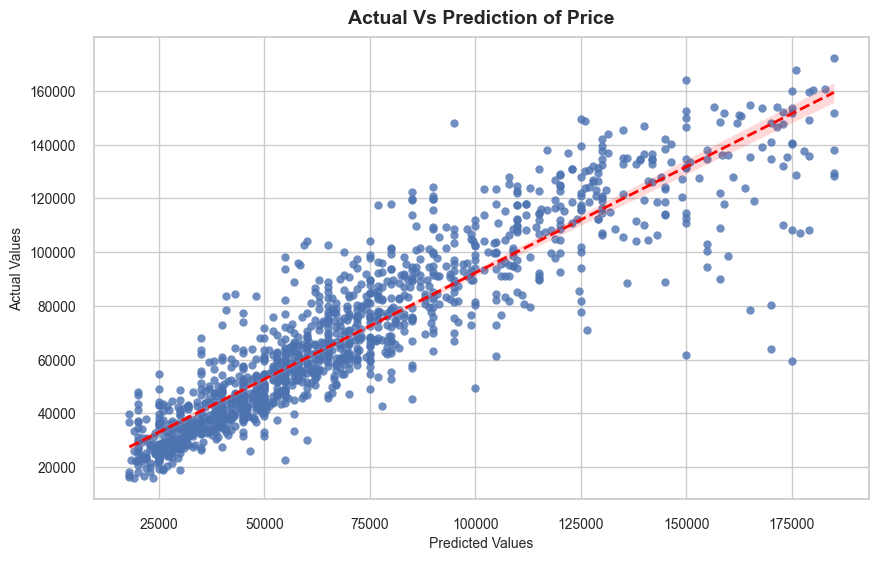

In [781]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(x=y_test, y=y_pred, ax=ax, line_kws={'color':'red', 'lw':2, 'alpha':1, 'ls':'--'})

ax.set_title('Actual Vs Prediction of Price', size=14, pad=10, fontweight='bold')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

plt.show()

Berdasarkan **scatter plot** **Actual vs. Predicted Price**, berikut adalah insight yang dapat ditarik:

1. **Korelasi Positif yang Kuat**:

   * Plot menunjukkan hubungan positif yang sangat kuat antara harga **aktual** dan **prediksi**. Garis regresi hampir sejajar dengan titik data, mengindikasikan bahwa model **CatBoost** menghasilkan prediksi harga yang sangat akurat.

2. **Penyebaran Titik Data**:

   * Meskipun sebagian besar titik data sangat dekat dengan garis regresi, terdapat sedikit penyebaran pada bagian harga tinggi dan rendah. Ini menunjukkan adanya kesalahan prediksi yang lebih besar pada harga ekstrim.

3. **Performa Model yang Baik**:

   * Secara keseluruhan, model bekerja dengan sangat baik, dengan mayoritas titik data berada dekat garis prediksi. Beberapa titik yang jauh dari garis menunjukkan area yang masih bisa ditingkatkan, tetapi model sudah sangat efektif.

Kesimpulan:

Model **CatBoost** memiliki performa yang sangat baik dalam memprediksi harga, meskipun ada sedikit penyimpangan untuk harga ekstrem yang bisa diperbaiki lebih lanjut.


## **Interpretasi Model**

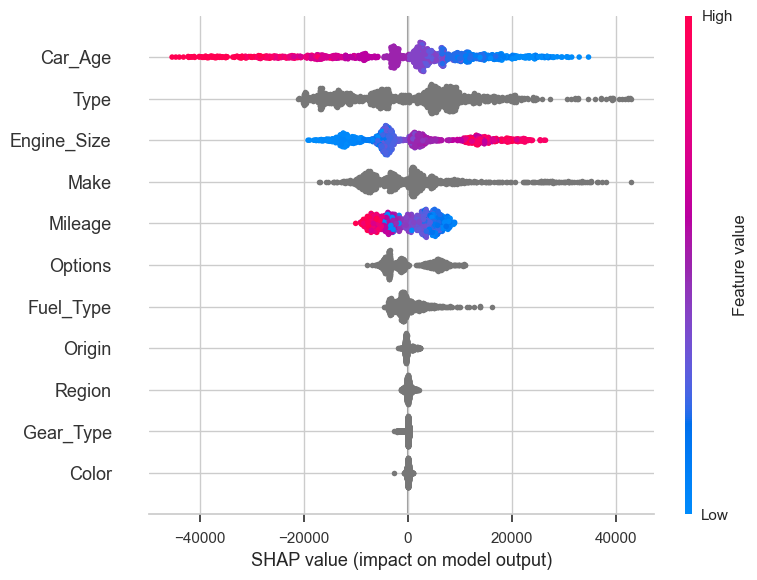

In [782]:
# Menggunakan SHAP TreeExplainer untuk model pohon
explainer = shap.TreeExplainer(best_model, feature_perturbation="tree_path_dependent")

# Hitung SHAP values untuk data uji
shap_values = explainer.shap_values(X_test)

# Buat SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

## Interpretasi Model Berdasarkan SHAP Values

### 1. **Pengaruh Fitur Utama**

- **`Car_Age`** merupakan fitur dengan pengaruh terbesar terhadap prediksi harga mobil:
  - Mobil yang **lebih tua** (ditandai warna merah) cenderung **menurunkan prediksi harga** (nilai SHAP negatif).
  - Mobil **lebih baru** (warna biru) memberi **dampak positif** terhadap harga (nilai SHAP positif).
  
- **`Engine_Size`** juga memberikan kontribusi besar:
  - Kapasitas mesin **besar** (warna merah) mendorong **prediksi harga naik** secara signifikan.
  - Mesin **berukuran kecil** (warna biru) memberi pengaruh negatif terhadap harga.

---

### 2. **Fitur dengan Pengaruh Sedang**

- **`Mileage`** (jarak tempuh):
  - **Mileage rendah** (biru) berdampak **positif** terhadap harga mobil.
  - **Mileage tinggi** (merah) cenderung **menurunkan harga**, meskipun tidak sebesar pengaruh `Car_Age`.

- **`Make`** (merek mobil):
  - Memiliki kontribusi yang cukup **variatif**, bergantung pada jenis merek, namun secara umum berdampak **sedang** terhadap prediksi harga.

---

### 3. **Fitur dengan Pengaruh Kecil**

- **`Options`** (fitur tambahan):
  - Menunjukkan **pengaruh yang relatif kecil**, dengan nilai SHAP kebanyakan mendekati nol.

- **`Fuel_Type`**, **`Gear_Type`**, dan **`Color`**:
  - Ketiga fitur ini memiliki **sebaran SHAP yang sempit** dan mendekati nol, mengindikasikan kontribusi kecil terhadap hasil prediksi model.

---

### 4. **Fitur Kategorikal dengan Pengaruh Terbatas**

- **`Type`**, **`Region`**, dan **`Origin`**:
  - Meskipun masih memiliki kontribusi, dampaknya tergolong **rendah dibanding fitur numerik utama** seperti `Car_Age` dan `Engine_Size`.
  - Nilai SHAP untuk fitur-fitur ini juga terkonsentrasi di sekitar nol.

---

### **Kesimpulan**

- Fitur **paling penting** dalam prediksi harga mobil bekas adalah: `Car_Age` dan `Engine_Size`.
- Fitur seperti `Mileage` dan `Make` berkontribusi **sedang**, tergantung pada nilainya.
- Fitur `Options`, `Fuel_Type`, `Gear_Type`, `Color`, `Region`, dan `Origin` memiliki **pengaruh rendah** terhadap hasil prediksi model.


## Simulasi Bisnis

*1. Membantu Penjual Menentukan Harga yang Tepat*

* *Analisis masalah*: Menyebutkan tantangan yang dihadapi oleh penjual dalam menetapkan harga yang tepat, yang sering kali menyebabkan kesalahan harga (overpricing atau underpricing).
* *Solusi yang diusulkan*: Model memberikan estimasi harga yang lebih akurat, meminimalisir kesalahan harga, dan membantu penjual menetapkan harga yang kompetitif dengan data-driven.
* *Pengaruh bisnis*: Penjual mendapat panduan harga yang lebih obyektif, meningkatkan efisiensi dan kepercayaan dalam transaksi.

*2. Menjadi Referensi Harga bagi Pembeli*

* *Analisis masalah*: Pembeli sering kali kesulitan dalam menilai apakah harga mobil yang mereka minati wajar atau tidak.
* *Solusi yang diusulkan*: Model memberikan referensi harga berdasarkan atribut kendaraan, memungkinkan pembeli untuk mengevaluasi kewajaran harga.
* *Pengaruh bisnis*: Pembeli merasa lebih yakin dalam pengambilan keputusan finansial, meningkatkan kepercayaan terhadap platform.

*3. Mendorong Transparansi dan Peningkatan Transaksi di Syarah.com*

* *Analisis masalah*: Tanpa transparansi dalam penetapan harga, pembeli dan penjual mungkin tidak sepenuhnya yakin dalam transaksi, yang dapat menghambat volume transaksi.
* *Solusi yang diusulkan*: Integrasi fitur prediksi harga meningkatkan transparansi, yang pada gilirannya mendorong peningkatan volume transaksi dan memperkuat reputasi Syarah.com sebagai platform yang dapat diandalkan.
* *Pengaruh bisnis*: Meningkatkan kepuasan pengguna dan berpotensi meningkatkan volume transaksi di platform, memberikan dampak positif terhadap pendapatan dan pertumbuhan bisnis.

## **Kesimpulan, Saran, dan Limitasi Model**

### *Kesimpulan Model*

1. *Pengembangan Model Prediksi Harga Mobil Bekas*
   Model prediksi harga mobil bekas berhasil dibangun menggunakan algoritma *CatBoost Regressor*, yang terbukti efektif dalam mempelajari hubungan kompleks antara fitur-fitur kendaraan dan harga jualnya.

2. *Evaluasi Model*

   * Model *CatBoost Ordered Boosting* menunjukkan performa yang memuaskan, dengan *MAPE Test* sebesar 15.82%, yang berarti bahwa rata-rata prediksi harga mobil hanya melenceng sekitar 16% dari harga sebenarnya pada data uji.
   * Selisih antara *MAPE Test* dan *MAPE Train* relatif kecil (\~1.87%), menunjukkan bahwa model tidak mengalami overfitting yang signifikan dan memiliki kemampuan generalisasi yang baik.

3. *Fitur yang Berpengaruh Signifikan*
   Beberapa fitur yang memiliki pengaruh signifikan terhadap harga mobil bekas meliputi:
   * Usia kendaraan
   * Jenis kendaraan
   * Ukuran mesin kendaraan
   * Merek kendaraan
   * Jarak tempuh kendaraan

---

### *Kesimpulan Bisnis*

1. *Tingkat error model* yang disebutkan (16%) memberikan gambaran realistis dan transparan mengenai keterbatasan model.
2. *Penekanan pada nilai transparansi* dan *akuratnya estimasi harga* menciptakan kepercayaan yang lebih besar dari pengguna terhadap platform.
3. *Meningkatkan efisiensi transaksi* baik untuk pembeli maupun penjual, yang berdampak langsung pada *pertumbuhan bisnis*.

---

### *Rekomendasi Bisnis:*

1. Disarankan untuk mengintegrasikan model ini sebagai alat bantu estimasi harga otomatis di platform *Syarah.com*, untuk mempermudah pengguna dalam menentukan harga jual dan beli yang lebih akurat.

2. Model ini dapat digunakan untuk melakukan validasi harga secara otomatis dan memberikan notifikasi kepada pengguna jika harga yang dimasukkan terlalu menyimpang dari estimasi yang dihasilkan oleh model.

3. Model harus diperbarui secara berkala dengan data terbaru untuk memastikan relevansi dan responsivitas terhadap dinamika tren pasar yang berubah.

4. Untuk meningkatkan akurasi model, disarankan untuk menambahkan fitur-fitur baru, seperti:
   * Riwayat service kendaraan
   * Kondisi kendaraan (misalnya: pernah mengalami kecelakaan atau kebanjiran)

---

### *Limitasi Model*

1. Model ini belum mempertimbangkan kondisi visual kendaraan secara langsung, seperti apakah kendaraan pernah mengalami kecelakaan atau memiliki kerusakan interior yang signifikan.

2. Penghapusan outlier ekstrem membatasi model ini hanya pada pasar mobil secara umum, sehingga tidak dapat secara efektif memprediksi harga untuk mobil mewah, langka, atau edisi kolektor.

3. Model ini tidak mempertimbangkan faktor eksternal seperti perubahan musim, promosi dealer, atau fluktuasi ekonomi makro yang dapat memengaruhi harga mobil.

4. Model ini dilatih menggunakan snapshot data historis, bukan data real-time, yang menyebabkan keterbatasan dalam memprediksi perubahan harga jangka pendek yang dipengaruhi oleh faktor-faktor eksternal.

---

### *Rekomendasi Pengembangan Model*
* Untuk kendaraan dengan harga tinggi, disarankan untuk mengembangkan model khusus atau menerapkan aturan penyesuaian berbasis aturan (rule-based adjustment) guna mengendalikan kesalahan nominal dan memastikan prediksi harga tetap akurat dan realistis pada segmen pasar tersebut.